In [2]:
pip install npTDMS

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
from scipy.optimize import curve_fit
from collections import OrderedDict
from nptdms import TdmsFile as tdms
import spicy as sp

In [3]:
directory= '/Users/hannadixon/Desktop/OneDrive - UW/Hanna Dixon/20240719 OECT'
filename = "20240719 RRa KTFSI 3.tdms"
filepath = os.path.join(directory, filename)

In [6]:
test = tdms.read(filepath)

In [8]:
for group in test.groups():
    print("Group:", group)
    for channel in group.channels():
        data = channel[:]
        print("\t\tData:", data)
        properties = channel.properties
        print("\t\tProperties:", properties)

Group: <TdmsGroup with path /'Untitled'>
		Data: [-0.0011605  -0.0013481  -0.00128557 ...  0.78974046  0.78983426
  0.78989679]
		Properties: OrderedDict([('wf_start_time', numpy.datetime64('2024-07-20T01:44:25.167805')), ('wf_start_offset', 0.0), ('wf_increment', 2.999999999999997e-05), ('wf_samples', 10000), ('NI_ChannelName', 'Vg measurement'), ('NI_UnitDescription', 'Volts'), ('unit_string', 'Volts')])
		Data: [-4.51916458e-06 -8.30100508e-06 -7.26959404e-06 ...  8.94642935e-05
  9.01206465e-05  9.04957053e-05]
		Properties: OrderedDict([('wf_start_time', numpy.datetime64('2024-07-20T01:44:25.167805')), ('wf_start_offset', 0.0), ('wf_increment', 2.999999999999997e-05), ('wf_samples', 10000), ('NI_ChannelName', 'Ig measurements'), ('NI_UnitDescription', 'Amps'), ('unit_string', 'Amps')])
		Data: [-1.39719829e-06 -1.94413724e-06 -1.39719829e-06 ... -1.71802935e-05
 -1.71021594e-05 -1.66333546e-05]
		Properties: OrderedDict([('wf_start_time', numpy.datetime64('2024-07-20T01:44:25.1678

In [10]:
tdms_file = test

# Create an empty list to store channel data
channel_data = []

# Explore the structure dynamically
for group in tdms_file.groups():
    for channel in group.channels():
        # Extract data and properties
        data = channel[:]
        properties = channel.properties
        # Create a dictionary with channel data and properties
        channel_dict = {
            "Group": group.name,
            "Channel": channel.name,
            "Data": data,
            "Properties": properties
        }
        # Append the dictionary to the list
        channel_data.append(channel_dict)

# Create a DataFrame from the list of dictionaries
df = pd.DataFrame(channel_data)


In [12]:
df

,Group,Channel,Data,Properties
0,Untitled,Vg measurement,"[-0.0011605036514564361, -0.001348097846830883...","{'wf_start_time': 2024-07-20T01:44:25.167805, ..."
1,Untitled,Ig measurements,"[-4.519164575161502e-06, -8.301005080687053e-0...","{'wf_start_time': 2024-07-20T01:44:25.167805, ..."
2,Untitled,Id measurements,"[-1.3971982888566348e-06, -1.944137238455598e-...","{'wf_start_time': 2024-07-20T01:44:25.167805, ..."


In [14]:
channel_data = {}

# Explore the structure dynamically
for group in tdms_file.groups():
    for channel in group.channels():
        # Extract data
        data = channel[:]
        # Store data in the dictionary with channel name as key
        channel_data[channel.name] = data

# Create a DataFrame from the dictionary
df = pd.DataFrame(channel_data)

df

,Vg measurement,Ig measurements,Id measurements
0,-0.001161,-0.000005,-0.000001
1,-0.001348,-0.000008,-0.000002
2,-0.001286,-0.000007,-0.000001
3,-0.001317,-0.000009,-0.000002
4,-0.001223,-0.000012,-0.000002
...,...,...,...
20009995,0.789897,0.000089,-0.000017
20009996,0.789803,0.000090,-0.000017
20009997,0.789740,0.000089,-0.000017
20009998,0.789834,0.000090,-0.000017


In [46]:
df["Id measurements"]

0          -0.000001
1          -0.000002
2          -0.000001
3          -0.000002
4          -0.000002
              ...   
20009995   -0.000017
20009996   -0.000017
20009997   -0.000017
20009998   -0.000017
20009999   -0.000017
Name: Id measurements, Length: 20010000, dtype: float64

In [47]:
x = []
time = 600 / 20010000
for i in range(0, 20010000):
    time1 = time * i
    x.append(time1)
    
y = df["Id measurements"]

In [48]:
x = np.array(x)
y = np.array(y)

In [49]:
index_set1 = np.where((x >= 25.9) & (x <= 65))[0]
index_set2 = np.where((x >= 85.9) & (x <= 125))[0]
index_set3 = np.where((x >= 145.9) & (x <= 185))[0]
index_set4 = np.where((x >= 205.9) & (x <= 245))[0]
index_set5 = np.where((x >= 265.9) & (x <= 305))[0]
index_set6 = np.where((x >= 325.9) & (x <= 365))[0]
index_set7 = np.where((x >= 385.9) & (x <= 425))[0]
index_set8 = np.where((x >= 445.9) & (x <= 485))[0]
index_set9 = np.where((x >= 505.9) & (x <=545))[0]
index_set10 = np.where((x >= 565.9) & (x <= 600))[0]

In [50]:
print(max(y[index_set1]))
print(index_set2)
print(max(y[index_set2]))
print(max(y[index_set3]))
print(max(y[index_set7]))

0.00011775737077684758
[2864765 2864766 2864767 ... 4168748 4168749 4168750]
0.00010392762605753952
7.8299625467017e-05
4.91555896330131e-05


In [51]:
value, first = max((value, index) for (index, value) in enumerate(y[index_set1]))
value2, first2 = max((value, index) for (index, value) in enumerate(y[index_set2]))
value3, first3 = max((value, index) for (index, value) in enumerate(y[index_set3]))
value4, first4 = max((value, index) for (index, value) in enumerate(y[index_set4]))
value5, first5 = max((value, index) for (index, value) in enumerate(y[index_set5]))
value6, first6 = max((value, index) for (index, value) in enumerate(y[index_set6]))
value7, first7 = max((value, index) for (index, value) in enumerate(y[index_set7]))
value8, first8 = max((value, index) for (index, value) in enumerate(y[index_set8]))
value9, first9 = max((value, index) for (index, value) in enumerate(y[index_set9]))
value10, first10 = max((value, index) for (index, value) in enumerate(y[index_set10]))

In [52]:
value, last1 = min((value, index) for (index, value) in enumerate(y[index_set1]))
value2, last2 = min((value, index) for (index, value) in enumerate(y[index_set2]))
value3, last3 = min((value, index) for (index, value) in enumerate(y[index_set3]))
value4, last4 = min((value, index) for (index, value) in enumerate(y[index_set4]))
value5, last5 = min((value, index) for (index, value) in enumerate(y[index_set5]))
value6, last6 = min((value, index) for (index, value) in enumerate(y[index_set6]))
value7, last7 = min((value, index) for (index, value) in enumerate(y[index_set7]))
value8, last8 = min((value, index) for (index, value) in enumerate(y[index_set8]))
value9, last9 = min((value, index) for (index, value) in enumerate(y[index_set9]))
value10, last10 = min((value, index) for (index, value) in enumerate(y[index_set10]))

In [53]:
print(last1)
print(last2)

1139865
1138830


In [54]:
first_fixed = first + index_set1[0]
first2_fixed = index_set2[0] + first2
first3_fixed = index_set3[0] + first3
first4_fixed = index_set4[0] + first4
first5_fixed = index_set5[0] + first5
first6_fixed = index_set6[0] + first6
first7_fixed = index_set7[0] + first7
first8_fixed = index_set8[0] + first8
first9_fixed = index_set9[0] + first9
first10_fixed = index_set10[0] + first10

In [55]:
last1_fixed = last1 + index_set1[0]
last2_fixed = index_set2[0] + last2
last3_fixed = index_set3[0] + last3
last4_fixed = index_set4[0] + last4
last5_fixed = index_set5[0] + last5
last6_fixed = index_set6[0] + last6
last7_fixed = index_set7[0] + last7
last8_fixed = index_set8[0] + last8
last9_fixed = index_set9[0] + last9
last10_fixed = index_set10[0] + last10

In [56]:
print(x[first2_fixed])
print(y[first2_fixed])

90.06221889055472
0.00010392762605753952


In [57]:
print(len(y))

20010000


NameError: name 'zero' is not defined

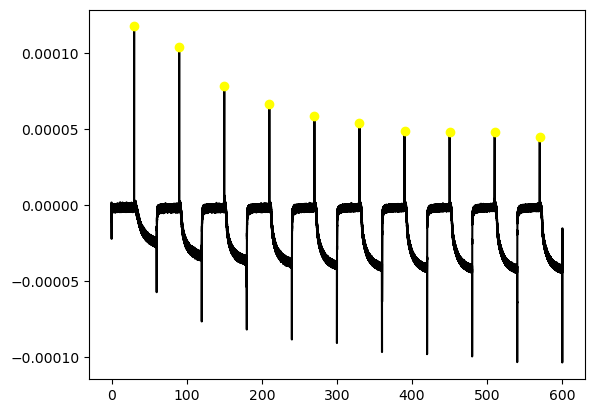

In [58]:
figure1, axis1 = plot.subplots()

axis1.plot(x, y, linestyle = 'solid',
           marker = 'None', color = 'black', label = 'None')
axis1.plot(x[first_fixed], y[first_fixed], linestyle = 'None',
           marker = 'o', color = 'yellow')
axis1.plot(x[first2_fixed], y[first2_fixed], linestyle = 'None',
           marker = 'o', color = 'yellow')
axis1.plot(x[first3_fixed], y[first3_fixed], linestyle = 'None',
           marker = 'o', color = 'yellow')
axis1.plot(x[first4_fixed], y[first4_fixed], linestyle = 'None',
           marker = 'o', color = 'yellow')
axis1.plot(x[first5_fixed], y[first5_fixed], linestyle = 'None',
           marker = 'o', color = 'yellow')
axis1.plot(x[first6_fixed], y[first6_fixed], linestyle = 'None',
           marker = 'o', color = 'yellow')
axis1.plot(x[first7_fixed], y[first7_fixed], linestyle = 'None',
           marker = 'o', color = 'yellow')
axis1.plot(x[first8_fixed], y[first8_fixed], linestyle = 'None',
           marker = 'o', color = 'yellow')
axis1.plot(x[first9_fixed], y[first9_fixed], linestyle = 'None',
           marker = 'o', color = 'yellow')
axis1.plot(x[first10_fixed], y[first10_fixed], linestyle = 'None',
           marker = 'o', color = 'yellow')
axis1.plot(x[0:20010000], zero[0:20010000], linestyle = 'solid',
           marker = 'None', color = 'blue')
axis1.set_title('RRa 0.5V Drain Current')
axis1.set_xlabel('Time (s)')
axis1.set_ylabel('Drain current')

In [ ]:
print(first_fixed)
print(first2_fixed)
print(first3_fixed)
print(first4_fixed)
print(first5_fixed)
print(first6_fixed)
print(first7_fixed)
print(first8_fixed)
print(first9_fixed)
print(first10_fixed)

In [ ]:
print(max(y[index_set1]))
print(max(y[index_set2]))
print(max(y[index_set3]))
print(max(y[index_set4]))
print(max(y[index_set5]))
print(max(y[index_set6]))
print(max(y[index_set7]))
print(max(y[index_set8]))
print(max(y[index_set9]))
print(max(y[index_set10]))

In [ ]:
zero = []

for i in range(len(x)):
    initial = 0
    zero.append(initial)

In [ ]:
xdatafunc = np.array(x[first_fixed - first_fixed:last1_fixed - first_fixed])
xdatafunc2 = np.array(x[first_fixed - first_fixed:last2_fixed - first2_fixed])
xdatafunc3 = np.array(x[first_fixed - first_fixed:last3_fixed - first3_fixed])
xdatafunc4 = np.array(x[first_fixed - first_fixed:last4_fixed - first4_fixed])
xdatafunc5 = np.array(x[first_fixed - first_fixed:last5_fixed - first5_fixed])
xdatafunc6 = np.array(x[first_fixed - first_fixed:last6_fixed - first6_fixed])
xdatafunc7 = np.array(x[first_fixed - first_fixed:last7_fixed - first7_fixed])
xdatafunc8 = np.array(x[first_fixed - first_fixed:last8_fixed - first8_fixed])
xdatafunc9 = np.array(x[first_fixed - first_fixed:last9_fixed - first9_fixed])
xdatafunc10 = np.array(x[first_fixed - first_fixed:last10_fixed - first10_fixed])
ydatafunc1 = np.array(y[first_fixed:last1_fixed])
ydatafunc2 = np.array(y[first2_fixed:last2_fixed])
ydatafunc3 = np.array(y[first3_fixed:last3_fixed])
ydatafunc4 = np.array(y[first4_fixed:last4_fixed])
ydatafunc5 = np.array(y[first5_fixed:last5_fixed])
ydatafunc6 = np.array(y[first6_fixed:last6_fixed])
ydatafunc7 = np.array(y[first7_fixed:last7_fixed])
ydatafunc8 = np.array(y[first8_fixed:last8_fixed])
ydatafunc9 = np.array(y[first9_fixed:last9_fixed])
ydatafunc10 = np.array(y[first10_fixed:last10_fixed])

In [ ]:
length1 = len(xdatafunc)
length2 = len(xdatafunc2)
length3 = len(xdatafunc3)
length4 = len(xdatafunc4)
length5 = len(xdatafunc5)
length6 = len(xdatafunc6)
length7 = len(xdatafunc7)
length8 = len(xdatafunc8)
length9 = len(xdatafunc9)
length10 = len(xdatafunc10)

In [ ]:
print(x)
print(xdatafunc)
print(ydatafunc3)
print(length5)
print(len(xdatafunc5))

In [ ]:
index_5seconds1 = np.where((ydatafunc1 <= y[first_fixed]) & (xdatafunc <= 5)) [0]
index_5seconds2 = np.where((ydatafunc2 <= y[first2_fixed]) & (xdatafunc2 <= 5)) [0]
index_5seconds3 = np.where((ydatafunc3 <= y[first3_fixed]) & (xdatafunc3 <= 5)) [0]
index_5seconds4 = np.where((ydatafunc4 <= y[first4_fixed]) & (xdatafunc4 <= 5)) [0]
index_5seconds5 = np.where((ydatafunc5 <= y[first5_fixed]) & (xdatafunc5 <= 5)) [0]
index_5seconds6 = np.where((ydatafunc6 <= y[first6_fixed]) & (xdatafunc6 <= 5)) [0]
index_5seconds7 = np.where((ydatafunc7 <= y[first7_fixed]) & (xdatafunc7 <= 5)) [0]
index_5seconds8 = np.where((ydatafunc8 <= y[first8_fixed]) & (xdatafunc8 <= 5)) [0]
index_5seconds9 = np.where((ydatafunc9 <= y[first9_fixed]) & (xdatafunc9 <= 5)) [0]
index_5seconds10 = np.where((ydatafunc10 <= y[first10_fixed]) & (xdatafunc10 <= 5)) [0]

In [ ]:
print(y[first2_fixed])
print(y[index_5seconds2])
print(ydatafunc2)

In [ ]:
len1 = len(xdatafunc[index_5seconds1])
len2 = len(xdatafunc2[index_5seconds2])
len3 = len(xdatafunc3[index_5seconds3])
len4 = len(xdatafunc4[index_5seconds4])
len5 = len(xdatafunc5[index_5seconds5])
len6 = len(xdatafunc6[index_5seconds6])
len7 = len(xdatafunc7[index_5seconds7])
len8 = len(xdatafunc8[index_5seconds8])
len9 = len(xdatafunc9[index_5seconds9])
len10 = len(xdatafunc10[index_5seconds10])

In [ ]:
underzero1 = np.where(ydatafunc1 <= 0) [0]
underzero2 = np.where(ydatafunc2 <= 0) [0]
underzero3 = np.where(ydatafunc3 <= 0) [0]
underzero4 = np.where(ydatafunc4 <= 0) [0]
underzero5 = np.where(ydatafunc5 <= 0) [0]
underzero6 = np.where(ydatafunc6 <= 0) [0]
underzero7 = np.where(ydatafunc7 <= 0) [0]
underzero8 = np.where(ydatafunc8 <= 0) [0]
underzero9 = np.where(ydatafunc9 <= 0) [0]
underzero10 = np.where(ydatafunc10 <= 0) [0]

In [ ]:
print(ydatafunc1[underzero1])

In [ ]:
figure12, axis12 = plot.subplots()

axis12.plot(xdatafunc[index_5seconds1], ydatafunc1[index_5seconds1], linestyle = 'solid',
            marker = 'None', color = 'black')
axis12.plot(xdatafunc[index_5seconds1], zero[0:len1], linestyle = 'solid',
           marker = 'None', color = 'blue')

axis12.set_xlabel('Time [s]')
axis12.set_ylabel('Drain current [A]')
axis12.set_title('RRe at 0.5V cycle 1')

In [ ]:
def func1(x1, a1, b1, c1):
    return a1 * np.exp(-b1 * x1) + c1
    
a1_guess = 1
b1_guess = 1
c1_guess = 1

popt1, pcov1 = sp.optimize.curve_fit(func1, xdatafunc, ydatafunc1, p0 = [a1_guess, b1_guess, c1_guess])

a1 = popt1[0]
b1 = popt1[1]
c1 = popt1[2]

In [ ]:
y_optimized1 = a1 * np.exp(-b1 * xdatafunc) + c1

In [ ]:
figure2, axis2 = plot.subplots()

axis2.plot(xdatafunc, ydatafunc1, linestyle = 'solid',
           marker = 'None', color = 'black')
#axis2.plot(xdatafunc[begin5seconds1:end5seconds1], ydatafunc1[begin5seconds1:end5seconds1], linestyle = 'solid',
          #marker = 'None', color = 'cyan')

#axis2.plot(x[wave_index], y[(first + wave_index[:])], linestyle = 'solid',
           #marker = 'None', color = 'black')
axis2.plot(xdatafunc, zero[0:length1], linestyle = 'solid',
           marker = 'None', color = 'blue')
axis2.set_title('RRe at 0.5V cycle 1')
axis2.set_xlabel('Time [s]')
axis2.set_ylabel('Drain current [A]')

In [ ]:
figure13, axis13 = plot.subplots()

axis13.plot(xdatafunc2[index_5seconds2], ydatafunc2[index_5seconds2], linestyle = 'solid',
            marker = 'None', color = 'black')
axis13.plot(xdatafunc2[index_5seconds2], zero[0:len2], linestyle = 'solid',
           marker = 'None', color = 'blue')

axis13.set_xlabel('Time [s]')
axis13.set_ylabel('Drain current [A]')
axis13.set_title('RRe at 0.5V cycle 2')

In [ ]:
print(ydatafunc2[index_5seconds2])

In [ ]:
figure3, axis3 = plot.subplots()

axis3.plot(xdatafunc2, ydatafunc2, linestyle = 'solid',
           marker = 'None', color = 'black')

#axis2.plot(x[wave_index], y[(first + wave_index[:])], linestyle = 'solid',
           #marker = 'None', color = 'black')
axis3.plot(xdatafunc2[0:length2], zero[0:length2], linestyle = 'solid',
           marker = 'None', color = 'blue')
axis3.set_title('RRe at 0.5V cycle 2')
axis3.set_xlabel('Time [s]')
axis3.set_ylabel('Drain current [A]')

In [ ]:
figure14, axis14 = plot.subplots()

axis14.plot(xdatafunc3[index_5seconds3], ydatafunc3[index_5seconds3], linestyle = 'solid',
           marker = 'None', color = 'black')
axis14.plot(xdatafunc3[index_5seconds3], zero[0:len3], linestyle = 'solid',
           marker = 'None', color = 'blue')

axis14.set_xlabel('Time [s]')
axis14.set_ylabel('Drain current [A]')
axis14.set_title('RRe at 0.5V cycle 3')

Text(0, 0.5, 'Drain current [A]')

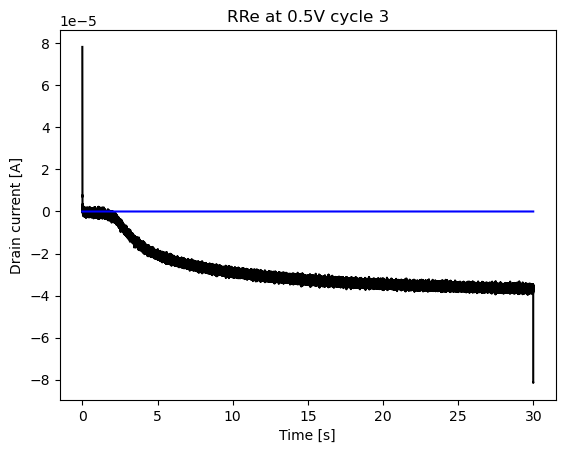

In [134]:
figure4, axis4 = plot.subplots()

axis4.plot(xdatafunc3, ydatafunc3, linestyle = 'solid',
           marker = 'None', color = 'black')

axis2.plot(xdatafunc3, ydatafunc3, linestyle = 'solid',
           marker = 'None', color = 'black')
axis4.plot(xdatafunc4[0:length4], zero[0:length4], linestyle = 'solid',
           marker = 'None', color = 'blue')
axis4.set_title('RRe at 0.5V cycle 3')
axis4.set_xlabel('Time [s]')
axis4.set_ylabel('Drain current [A]')

Text(0.5, 1.0, 'RRe at 0.5V cycle 4')

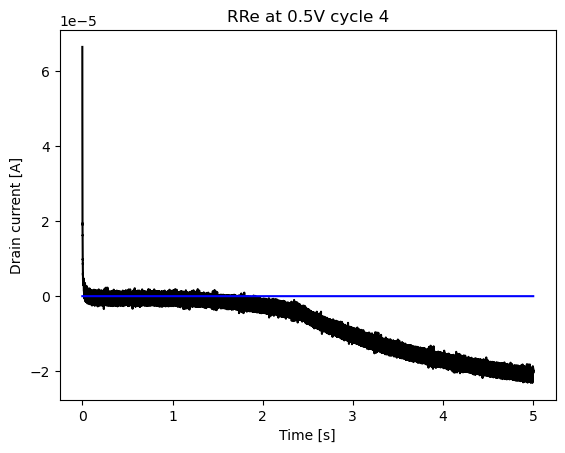

In [136]:
figure15, axis15 = plot.subplots()

axis15.plot(xdatafunc4[index_5seconds4], ydatafunc4[index_5seconds4], linestyle = 'solid',
            marker = 'None', color = 'black')
axis15.plot(xdatafunc4[index_5seconds4], zero[0:len4], linestyle = 'solid',
           marker = 'None', color = 'blue')

axis15.set_xlabel('Time [s]')
axis15.set_ylabel('Drain current [A]')
axis15.set_title('RRe at 0.5V cycle 4')

Text(0, 0.5, 'Drain current [A]')

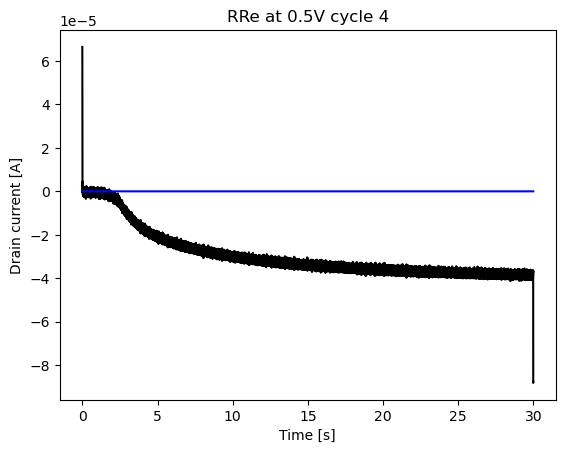

In [54]:
figure5, axis5 = plot.subplots()

axis5.plot(xdatafunc4, ydatafunc4, linestyle = 'solid',
           marker = 'None', color = 'black')

axis2.plot(xdatafunc4, ydatafunc4, linestyle = 'solid',
           marker = 'None', color = 'black')
axis5.plot(xdatafunc4[0:length4], zero[0:length4], linestyle = 'solid',
           marker = 'None', color = 'blue')
axis5.set_title('RRe at 0.5V cycle 4')
axis5.set_xlabel('Time [s]')
axis5.set_ylabel('Drain current [A]')

Text(0.5, 1.0, 'RRe at 0.5V cycle 5')

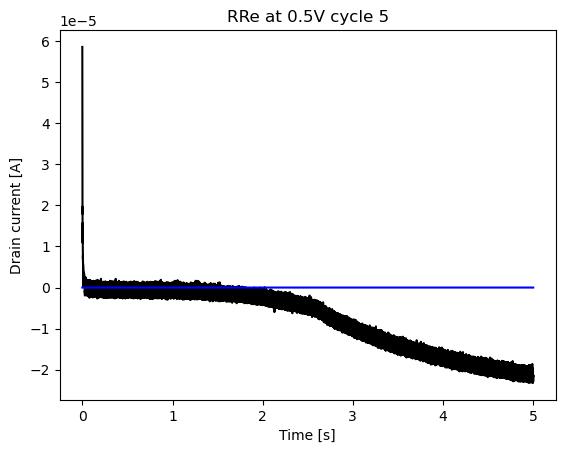

In [55]:
figure16, axis16 = plot.subplots()

axis16.plot(xdatafunc5[index_5seconds5], ydatafunc5[index_5seconds5], linestyle = 'solid',
            marker = 'None', color = 'black')
axis16.plot(xdatafunc5[index_5seconds5], zero[0:len4], linestyle = 'solid',
           marker = 'None', color = 'blue')

axis16.set_xlabel('Time [s]')
axis16.set_ylabel('Drain current [A]')
axis16.set_title('RRe at 0.5V cycle 5')

Text(0, 0.5, 'Drain current [A]')

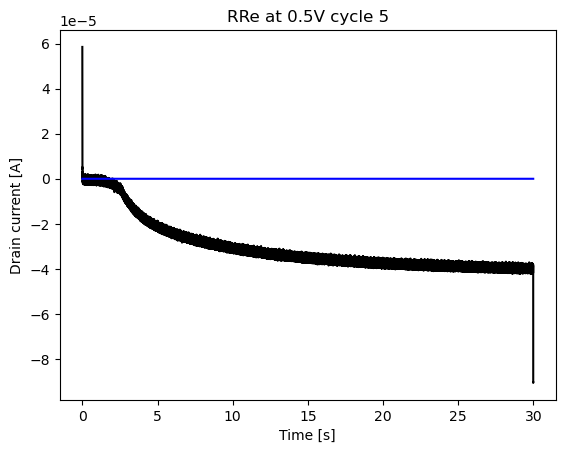

In [56]:
figure6, axis6 = plot.subplots()

axis6.plot(xdatafunc5, ydatafunc5, linestyle = 'solid',
           marker = 'None', color = 'black')

axis2.plot(xdatafunc5, ydatafunc5, linestyle = 'solid',
           marker = 'None', color = 'black')
axis6.plot(xdatafunc5[0:length5], zero[0:length5], linestyle = 'solid',
           marker = 'None', color = 'blue')
axis6.set_title('RRe at 0.5V cycle 5')
axis6.set_xlabel('Time [s]')
axis6.set_ylabel('Drain current [A]')

Text(0.5, 1.0, 'RRe at 0.5V cycle 6')

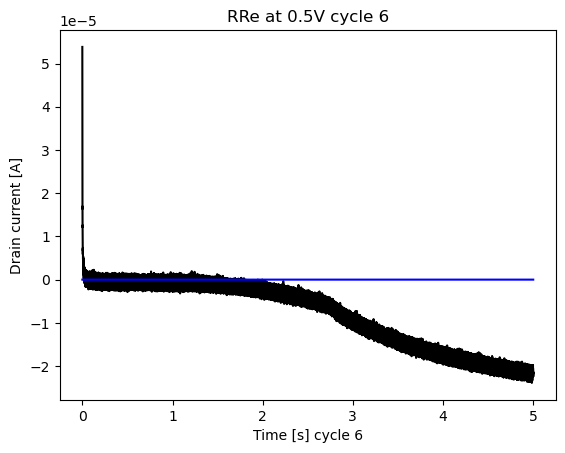

In [57]:
figure17, axis17 = plot.subplots()

axis17.plot(xdatafunc6[index_5seconds6], ydatafunc6[index_5seconds6], linestyle = 'solid',
            marker = 'None', color = 'black')
axis17.plot(xdatafunc6[index_5seconds6], zero[0:len6], linestyle = 'solid',
           marker = 'None', color = 'blue')

axis17.set_xlabel('Time [s] cycle 6')
axis17.set_ylabel('Drain current [A]')
axis17.set_title('RRe at 0.5V cycle 6')

Text(0, 0.5, 'Drain current [A]')

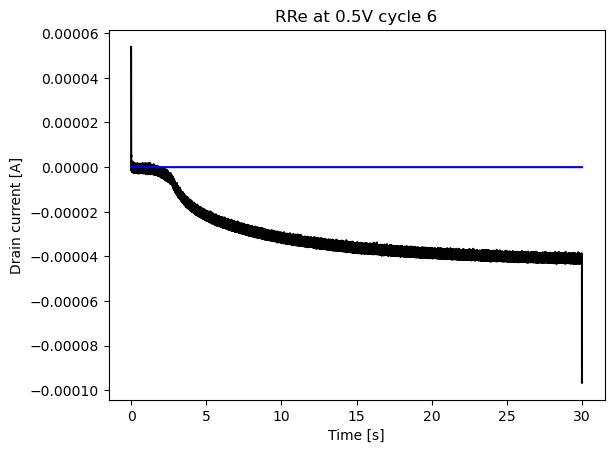

In [58]:
figure7, axis7 = plot.subplots()

axis7.plot(xdatafunc6, ydatafunc6, linestyle = 'solid',
           marker = 'None', color = 'black')

axis2.plot(xdatafunc6, ydatafunc6, linestyle = 'solid',
           marker = 'None', color = 'black')
axis7.plot(xdatafunc6[0:length6], zero[0:length6], linestyle = 'solid',
           marker = 'None', color = 'blue')
axis7.set_title('RRe at 0.5V cycle 6')
axis7.set_xlabel('Time [s]')
axis7.set_ylabel('Drain current [A]')

Text(0.5, 1.0, 'RRe at 0.5V cycle 7')

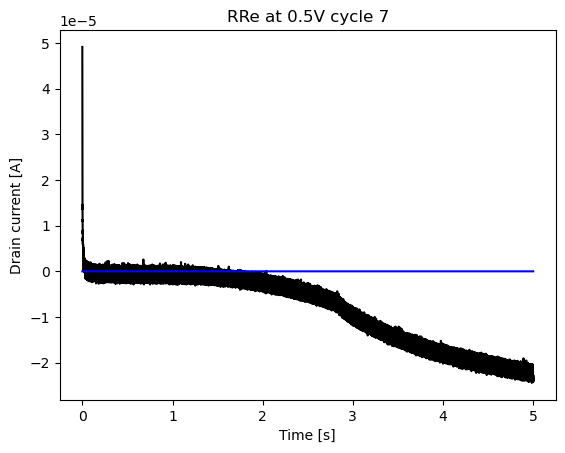

In [59]:
figure18, axis18 = plot.subplots()

axis18.plot(xdatafunc7[index_5seconds7], ydatafunc7[index_5seconds7], linestyle = 'solid',
            marker = 'None', color = 'black')
axis18.plot(xdatafunc7[index_5seconds7], zero[0:len7], linestyle = 'solid',
           marker = 'None', color = 'blue')

axis18.set_xlabel('Time [s]')
axis18.set_ylabel('Drain current [A]')
axis18.set_title('RRe at 0.5V cycle 7')

In [60]:
print(y[first7_fixed])
print(ydatafunc7[index_5seconds7])

4.91555896330131e-05
[ 4.91555896e-05  4.80617116e-05  4.62646264e-05 ... -2.31184876e-05
 -2.31184876e-05 -2.32747559e-05]


In [61]:
print(ydatafunc7)
print(ydatafunc7[index_5seconds7[0]])

[ 4.91555896e-05  4.80617116e-05  4.62646264e-05 ... -9.77365803e-05
 -9.74240438e-05 -9.82053850e-05]
4.91555896330131e-05


Text(0, 0.5, 'Drain current [A]')

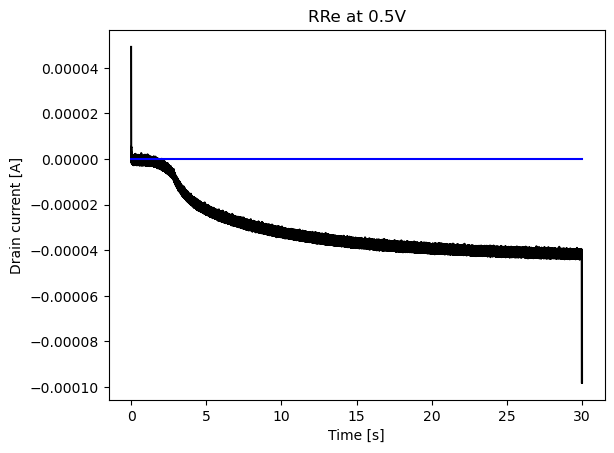

In [62]:
figure8, axis8 = plot.subplots()

axis8.plot(xdatafunc7, ydatafunc7, linestyle = 'solid',
           marker = 'None', color = 'black')

axis2.plot(xdatafunc7, ydatafunc7, linestyle = 'solid',
           marker = 'None', color = 'black')
axis8.plot(xdatafunc7[0:length7], zero[0:length7], linestyle = 'solid',
           marker = 'None', color = 'blue')
axis8.set_title('RRe at 0.5V')
axis8.set_xlabel('Time [s]')
axis8.set_ylabel('Drain current [A]')

In [63]:
print(ydatafunc7[0])

4.91555896330131e-05


Text(0, 0.5, 'Drain current [A]')

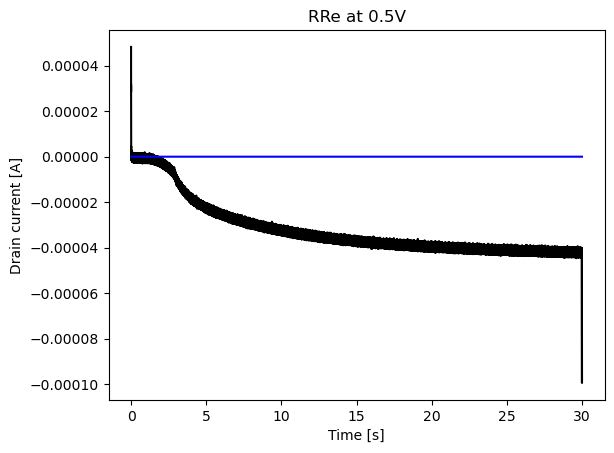

In [64]:
figure9, axis9 = plot.subplots()

axis9.plot(xdatafunc8, ydatafunc8, linestyle = 'solid',
           marker = 'None', color = 'black')

#axis2.plot(x[wave_index], y[(first + wave_index[:])], linestyle = 'solid',
           #marker = 'None', color = 'black')
axis9.plot(xdatafunc8[0:length8], zero[0:length8], linestyle = 'solid',
           marker = 'None', color = 'blue')
axis9.set_title('RRe at 0.5V')
axis9.set_xlabel('Time [s]')
axis9.set_ylabel('Drain current [A]')

Text(0.5, 1.0, 'RRe at 0.5V cycle 8')

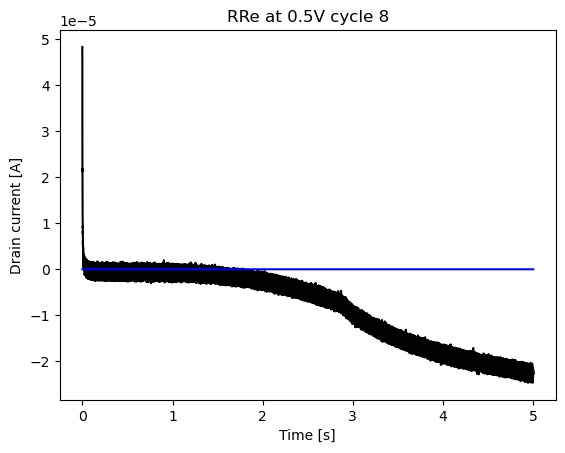

In [65]:
figure19, axis19 = plot.subplots()

axis19.plot(xdatafunc8[index_5seconds8], ydatafunc8[index_5seconds8], linestyle = 'solid',
            marker = 'None', color = 'black')
axis19.plot(xdatafunc8[index_5seconds8], zero[0:len8], linestyle = 'solid',
           marker = 'None', color = 'blue')

axis19.set_xlabel('Time [s]')
axis19.set_ylabel('Drain current [A]')
axis19.set_title('RRe at 0.5V cycle 8')

Text(0, 0.5, 'Drain current [A]')

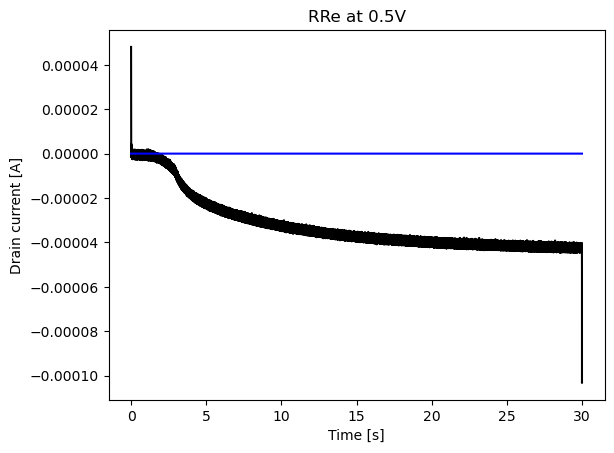

In [66]:
figure10, axis10 = plot.subplots()

axis10.plot(xdatafunc9, ydatafunc9, linestyle = 'solid',
           marker = 'None', color = 'black')

#axis2.plot(x[wave_index], y[(first + wave_index[:])], linestyle = 'solid',
           #marker = 'None', color = 'black')
axis10.plot(xdatafunc9[0:length9], zero[0:length9], linestyle = 'solid',
           marker = 'None', color = 'blue')
axis10.set_title('RRe at 0.5V')
axis10.set_xlabel('Time [s]')
axis10.set_ylabel('Drain current [A]')

Text(0.5, 1.0, 'RRe at 0.5V cycle 9')

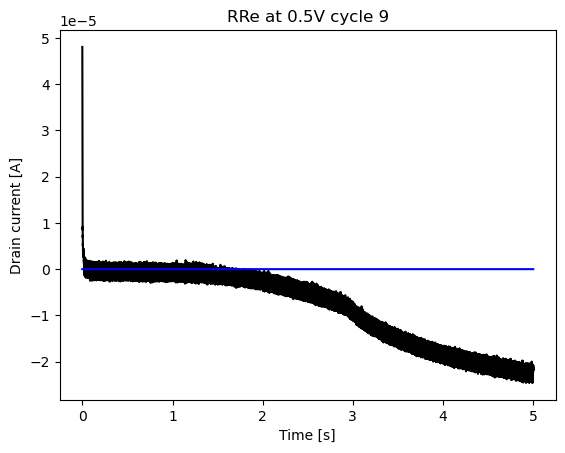

In [56]:
figure20, axis20 = plot.subplots()

axis20.plot(xdatafunc9[index_5seconds9], ydatafunc9[index_5seconds9], linestyle = 'solid',
            marker = 'None', color = 'black')
axis20.plot(xdatafunc9[index_5seconds9], zero[0:len9], linestyle = 'solid',
           marker = 'None', color = 'blue')

axis20.set_xlabel('Time [s]')
axis20.set_ylabel('Drain current [A]')
axis20.set_title('RRe at 0.5V cycle 9')

Text(0, 0.5, 'Drain current [A]')

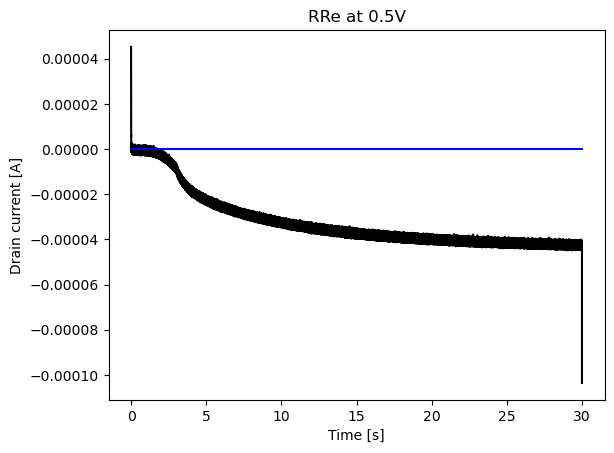

In [57]:
figure11, axis11 = plot.subplots()

axis11.plot(xdatafunc10, ydatafunc10, linestyle = 'solid',
           marker = 'None', color = 'black')

#axis2.plot(x[wave_index], y[(first + wave_index[:])], linestyle = 'solid',
           #marker = 'None', color = 'black')
axis11.plot(xdatafunc10[0:length10], zero[0:length10], linestyle = 'solid',
           marker = 'None', color = 'blue')
axis11.set_title('RRe at 0.5V')
axis11.set_xlabel('Time [s]')
axis11.set_ylabel('Drain current [A]')

Text(0.5, 1.0, 'RRe at 0.5V cycle 10')

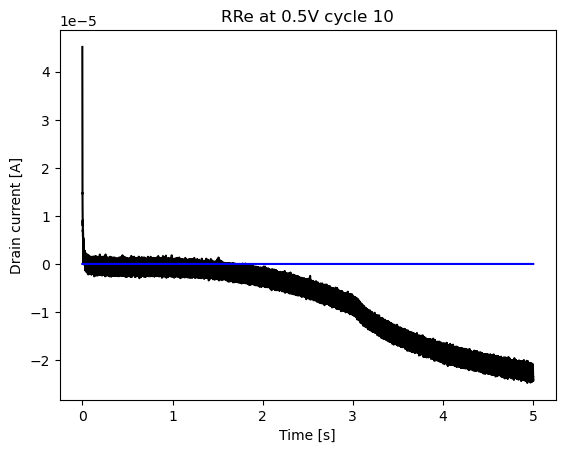

In [58]:
figure21, axis21 = plot.subplots()

axis21.plot(xdatafunc10[index_5seconds10], ydatafunc10[index_5seconds10], linestyle = 'solid',
            marker = 'None', color = 'black')
axis21.plot(xdatafunc10[index_5seconds10], zero[0:len10], linestyle = 'solid',
           marker = 'None', color = 'blue')

axis21.set_xlabel('Time [s]')
axis21.set_ylabel('Drain current [A]')
axis21.set_title('RRe at 0.5V cycle 10')

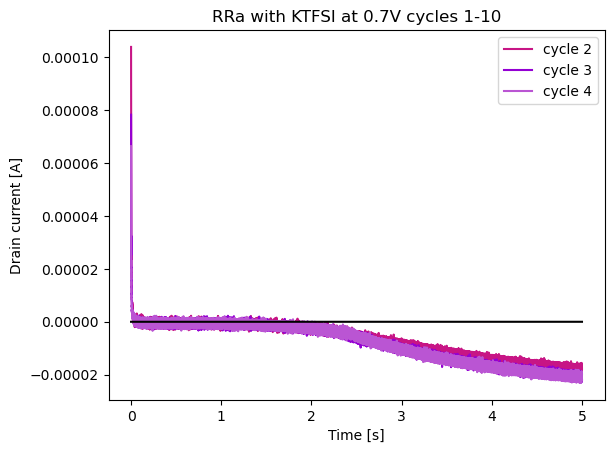

In [59]:
figure23, axis23 = plot.subplots()

#axis23.plot(xdatafunc[index_5seconds1], ydatafunc1[index_5seconds1], linestyle = 'solid',
            #marker = 'None', color = 'crimson', label = 'cycle 1')
axis23.plot(xdatafunc2[index_5seconds2], ydatafunc2[index_5seconds2], linestyle = 'solid',
            marker = 'None', color = 'mediumvioletred', label = 'cycle 2')
axis23.plot(xdatafunc3[index_5seconds3], ydatafunc3[index_5seconds3], linestyle = 'solid',
            marker = 'None', color = 'darkviolet', label = 'cycle 3')
axis23.plot(xdatafunc4[index_5seconds4], ydatafunc4[index_5seconds4], linestyle = 'solid',
            marker = 'None', color = 'mediumorchid', label = 'cycle 4')
#axis23.plot(xdatafunc5[index_5seconds5], ydatafunc5[index_5seconds5], linestyle = 'solid',
            #marker = 'None', color = 'mediumslateblue', label = 'cycle 5')
#axis23.plot(xdatafunc6[index_5seconds6], ydatafunc6[index_5seconds6], linestyle = 'solid',
            #marker = 'None', color = 'slateblue', label = 'cycle 6')
#axis23.plot(xdatafunc7[index_5seconds7], ydatafunc7[index_5seconds7], linestyle = 'solid',
            #marker = 'None', color = 'royalblue', label = 'cycle 7')
#axis23.plot(xdatafunc8[index_5seconds8], ydatafunc8[index_5seconds8], linestyle = 'solid',
            #marker = 'None', color = 'lightskyblue', label = 'cycle 8')
#axis23.plot(xdatafunc9[index_5seconds9], ydatafunc9[index_5seconds9], linestyle = 'solid',
            #marker = 'None', color = 'cornflowerblue', label = 'cycle 9')
#axis23.plot(xdatafunc10[index_5seconds10], ydatafunc10[index_5seconds10], linestyle = 'solid',
            #marker = 'None', color = 'lightsteelblue', label = 'cycle 10')

axis23.plot(xdatafunc[index_5seconds1], zero[0:len1], linestyle = 'solid',
           marker = 'None', color = 'black')

axis23.set_xlabel('Time [s]')
axis23.set_ylabel('Drain current [A]')
axis23.set_title('RRa with KTFSI at 0.7V cycles 1-10')
axis23.legend()

/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


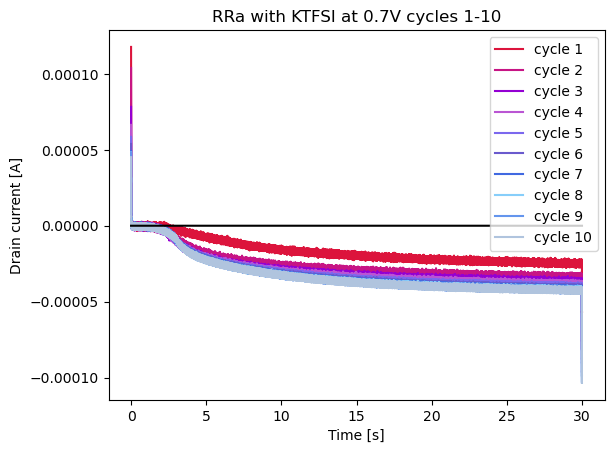

In [60]:
figure24, axis24 = plot.subplots()

axis24.plot(xdatafunc, ydatafunc1, linestyle = 'solid',
           marker = 'None', color = 'crimson', label = 'cycle 1')
axis24.plot(xdatafunc2, ydatafunc2, linestyle = 'solid',
           marker = 'None', color = 'mediumvioletred', label = 'cycle 2')
axis24.plot(xdatafunc3, ydatafunc3, linestyle = 'solid',
           marker = 'None', color = 'darkviolet', label = 'cycle 3')
axis24.plot(xdatafunc4, ydatafunc4, linestyle = 'solid',
           marker = 'None', color = 'mediumorchid', label = 'cycle 4')
axis24.plot(xdatafunc5, ydatafunc5, linestyle = 'solid',
           marker = 'None', color = 'mediumslateblue', label = 'cycle 5')
axis24.plot(xdatafunc6, ydatafunc6, linestyle = 'solid',
           marker = 'None', color = 'slateblue', label = 'cycle 6')
axis24.plot(xdatafunc7, ydatafunc7, linestyle = 'solid',
           marker = 'None', color = 'royalblue', label = 'cycle 7')
axis24.plot(xdatafunc8, ydatafunc8, linestyle = 'solid',
           marker = 'None', color = 'lightskyblue', label = 'cycle 8')
axis24.plot(xdatafunc9, ydatafunc9, linestyle = 'solid',
           marker = 'None', color = 'cornflowerblue', label = 'cycle 9')
axis24.plot(xdatafunc10, ydatafunc10, linestyle = 'solid',
           marker = 'None', color = 'lightsteelblue', label = 'cycle 10')

axis24.plot(xdatafunc, zero[0:length1], linestyle = 'solid',
           marker = 'None', color = 'black')

axis24.set_xlabel('Time [s]')
axis24.set_ylabel('Drain current [A]')
axis24.set_title('RRa with KTFSI at 0.7V cycles 1-10')
axis24.legend()

In [ ]:
integration1 = np.sum(ydatafunc1[underzero1])
integration2 = np.sum(ydatafunc2[underzero2])
integration3 = np.sum(ydatafunc3[underzero3])
integration4 = np.sum(ydatafunc4[underzero4])
integration5 = np.sum(ydatafunc5[underzero5])
integration6 = np.sum(ydatafunc6[underzero6])
integration7 = np.sum(ydatafunc7[underzero7])
integration8 = np.sum(ydatafunc8[underzero8])
integration9 = np.sum(ydatafunc9[underzero9])
integration10 = np.sum(ydatafunc10[underzero10])

In [ ]:
print(integration1)
print(integration2)
print(integration3)
print(integration4)
print(integration5)
print(integration6)
print(integration7)
print(integration8)
print(integration9)
print(integration10)

In [ ]:
integration = [-integration1, -integration2, -integration3, -integration4, -integration5, -integration6, -integration7, -integration8, -integration9, -integration10]

In [1360]:
start_optimize1 = np.where((xdatafunc[index_5seconds1] >= 0.1) & (xdatafunc[index_5seconds1] <= 2.5)) [0]
start_optimize2 = np.where((xdatafunc2[index_5seconds2] >= 0.1) & (xdatafunc2[index_5seconds2] <= 2.2)) [0]
start_optimize3 = np.where((xdatafunc3[index_5seconds3] >= 0.1) & (xdatafunc3[index_5seconds3] <= 2.26)) [0]
start_optimize4 = np.where((xdatafunc4[index_5seconds4] >= 0.1) & (xdatafunc4[index_5seconds4] <= 2.36)) [0]
start_optimize5 = np.where((xdatafunc5[index_5seconds5] >= 0.1) & (xdatafunc5[index_5seconds5] <= 2.56)) [0]
start_optimize6 = np.where((xdatafunc6[index_5seconds6] >= 0.1) & (xdatafunc6[index_5seconds6] <= 2.71)) [0]
start_optimize7 = np.where((xdatafunc7[index_5seconds7] >= 0.1) & (xdatafunc7[index_5seconds7] <= 2.81)) [0]
start_optimize8 = np.where((xdatafunc8[index_5seconds8] >= 0.1) & (xdatafunc8[index_5seconds8] <= 2.86)) [0]
start_optimize9 = np.where((xdatafunc9[index_5seconds9] >= 0.1) & (xdatafunc9[index_5seconds9] <= 2.91)) [0]
start_optimize10 = np.where((xdatafunc10[index_5seconds10] >= 0.1) & (xdatafunc10[index_5seconds10] <= 3.01)) [0]

In [1362]:
start_optimize1b = np.where((xdatafunc[index_5seconds1] >= 0.1) & (xdatafunc[index_5seconds1] <= 2.5)) [0]
start_optimize2b = np.where((xdatafunc2[index_5seconds2] >= 2.2) & (xdatafunc2[index_5seconds2] <= 5)) [0]
start_optimize3b = np.where((xdatafunc3[index_5seconds3] >= 2.24) & (xdatafunc3[index_5seconds3] <= 5)) [0]
start_optimize4b = np.where((xdatafunc4[index_5seconds4] >= 2.34) & (xdatafunc4[index_5seconds4] <= 5)) [0]
start_optimize5b = np.where((xdatafunc5[index_5seconds5] >= 2.54) & (xdatafunc5[index_5seconds5] <= 5)) [0]
start_optimize6b = np.where((xdatafunc6[index_5seconds6] >= 2.69) & (xdatafunc6[index_5seconds6] <= 5)) [0]
start_optimize7b = np.where((xdatafunc7[index_5seconds7] >= 2.79) & (xdatafunc7[index_5seconds7] <= 5)) [0]
start_optimize8b = np.where((xdatafunc8[index_5seconds8] >= 2.84) & (xdatafunc8[index_5seconds8] <= 5)) [0]
start_optimize9b = np.where((xdatafunc9[index_5seconds9] >= 2.89) & (xdatafunc9[index_5seconds9] <= 5)) [0]
start_optimize10b = np.where((xdatafunc10[index_5seconds10] >= 2.99) & (xdatafunc10[index_5seconds10] <= 5)) [0]

In [1364]:
#def func1(x1, a1, b1, c1):
    #return a1 * np.exp(-b1 * x1) + c1
    
#a1_guess = -0.000001
#b1_guess = -3
#c1_guess = 0.0001

#popt1, pcov1 = sp.optimize.curve_fit(func1, xdatafunc[start_optimize1], ydatafunc1[start_optimize1], p0 = [a1_guess, b1_guess, c1_guess])

#a1 = popt1[0]
#b1 = popt1[1]
#c1 = popt1[2]

In [1366]:
#print(a1)
#print(b1)
#print(c1)

In [1368]:
#y_optimized1 = a1 * np.exp(-b1 * xdatafunc[start_optimize1]) + c1

In [1370]:
def cubic1(x1, a1, b1, c1, d1):
    return a1*x1**3 + b1*x1**2 + c1*x1 + d1

a1_guess = -1
b1_guess = 1
c1_guess = 1
d1_guess = -1

popt1, pcov1 = sp.optimize.curve_fit(cubic1, xdatafunc[start_optimize1], ydatafunc1[start_optimize1], p0 = [a1_guess, b1_guess, c1_guess, d1_guess])

a1 = popt1[0]
b1 = popt1[1]
c1 = popt1[2]
d1 = popt1[3]

In [1371]:
def cubic1b(x1b, a1b, b1b, c1b, d1b):
    return a1b*x1b**3 + b1b*x1b**2 + c1b*x1b + d1b

a1b_guess = -1
b1b_guess = 1
c1b_guess = 1
d1b_guess = -1

popt1b, pcov1b = sp.optimize.curve_fit(cubic1b, xdatafunc[start_optimize1b], ydatafunc1[start_optimize1b], p0 = [a1b_guess, b1b_guess, c1b_guess, d1b_guess])

a1b = popt1[0]
b1b = popt1[1]
c1b = popt1[2]
d1b = popt1[3]

In [1373]:
print(a1)
print(b1)
print(c1)
print(d1)

-4.5607966043482926e-07
1.5096768472080327e-06
-1.4701408921932783e-06
-5.4124006651394195e-08


In [1375]:
lineartime = np.where((xdatafunc[index_5seconds1] >= 0) & (xdatafunc[index_5seconds1] <= 0.5)) [0]

In [1376]:
average1 = np.average(ydatafunc1[15000:20000])
print(average1)
zero1 = zero + average1

-4.396019471113113e-07


In [1377]:
y_optimized1 = (a1*xdatafunc[start_optimize1]**3 + b1*xdatafunc[start_optimize1]**2 + c1*xdatafunc[start_optimize1] + d1)

In [1378]:
print(len(index_5seconds1))

166751


Text(0.5, 1.0, 'RRa with KTFSI at 0.8V cycle 1')

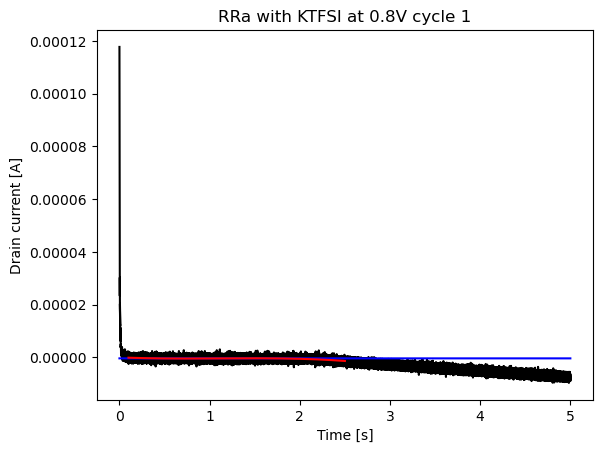

In [1382]:
figure22, axis22 = plot.subplots()

axis22.plot(xdatafunc[index_5seconds1], ydatafunc1[index_5seconds1], linestyle = 'solid',
            marker = 'None', color = 'black')
axis22.plot(xdatafunc[index_5seconds1], zero1[0:len1], linestyle = 'solid',
           marker = 'None', color = 'blue')
axis22.plot(xdatafunc[start_optimize1], y_optimized1, linestyle = 'solid',
            marker = 'None', color = 'red')

axis22.set_xlabel('Time [s]')
axis22.set_ylabel('Drain current [A]')
axis22.set_title('RRa with KTFSI at 0.8V cycle 1')

In [1383]:
df1 = ydatafunc1[start_optimize1]
df1_optimized = y_optimized1

In [1386]:
df1_optimized

array([-1.86497407e-07, -1.86532845e-07, -1.86568280e-07, ...,
       -1.42009232e-06, -1.42016648e-06, -1.42024064e-06])

In [1387]:
zero1min = zero1[0] - 0.00000000005
zero1max = zero1[0] + 0.00000000005

In [1388]:
intersect1 = np.where((df1_optimized >= zero1min) & (df1_optimized <= zero1max)) [0]
intersect1_fixed = start_optimize1[0] + intersect1[-1]
print(intersect1_fixed)
print(xdatafunc[intersect1_fixed])

57601
1.7271664167916043


In [1389]:
#intersect1 = np.where(df1 <= 0) [0]
#intersect1 = start_optimize1[0] + intersect1[0]
#print(xdatafunc[intersect1])

In [1390]:
def cubic2(x2, a2, b2, c2, d2):
    return a2*x2**3 + b2*x2**2 + c2*x2 + d2

a2_guess = -1
b2_guess = 1
c2_guess = 1
d2_guess = -1

popt2, pcov2 = sp.optimize.curve_fit(cubic2, xdatafunc2[start_optimize2], ydatafunc2[start_optimize2], p0 = [a2_guess, b2_guess, c2_guess, d2_guess])

a2 = popt2[0]
b2 = popt2[1]
c2 = popt2[2]
d2 = popt2[3]

print(a2)
print(b2)
print(c2)
print(d2)

average2 = np.average(ydatafunc2[15000:20000])
print(average2)
y_optimized2 = (a2*xdatafunc2[start_optimize2]**3 + b2*xdatafunc2[start_optimize2]**2 + c2*xdatafunc2[start_optimize2] + d2)

-5.624987527008286e-07
1.1339679431732518e-06
-1.0385356970582465e-06
-2.4978763532506574e-07
-5.617881086901363e-07


In [1391]:
def cubic2b(x2b, a2b, b2b, c2b, d2b):
    return a2b*x2b**3 + b2b*x2b**2 + c2b*x2b + d2b

a2b_guess = -1
b2b_guess = 1
c2b_guess = 1
d2b_guess = -1

popt2b, pcov2b = sp.optimize.curve_fit(cubic2b, xdatafunc2[start_optimize2b], ydatafunc2[start_optimize2b], p0 = [a2b_guess, b2b_guess, c2b_guess, d2b_guess])

a2b = popt2b[0]
b2b = popt2b[1]
c2b = popt2b[2]
d2b = popt2b[3]

print(a2b)
print(b2b)
print(c2b)
print(d2b)

#average2b = np.average(ydatafunc2[15000:20000])
#print(average2)
y_optimized2b = (a2b*xdatafunc2[start_optimize2b]**3 + b2b*xdatafunc2[start_optimize2b]**2 + c2b*xdatafunc2[start_optimize2b] + d2b)

1.6522948825129842e-07
-9.356164368825786e-07
-5.267295493132617e-06
1.1071470034357803e-05


In [1400]:
zero2 = zero + average2

Text(0.5, 1.0, 'RRa with KTFSI at 0.8V cycle 2')

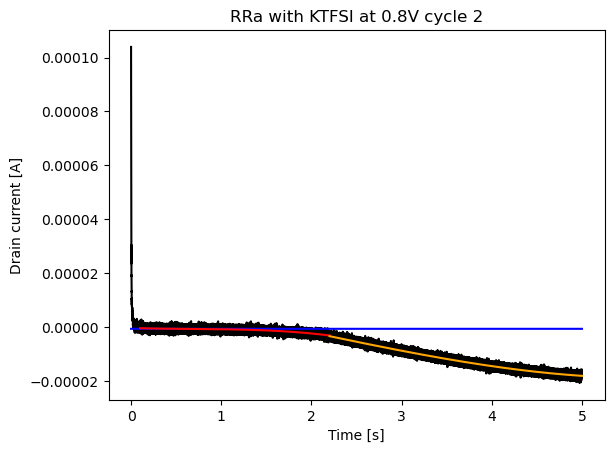

In [1438]:
figure25, axis25 = plot.subplots()

axis25.plot(xdatafunc2[index_5seconds2], ydatafunc2[index_5seconds2], linestyle = 'solid',
            marker = 'None', color = 'black')
axis25.plot(xdatafunc2[index_5seconds2], zero2[0:len2], linestyle = 'solid',
           marker = 'None', color = 'blue')
axis25.plot(xdatafunc2[start_optimize2], y_optimized2, linestyle = 'solid',
            marker = 'None', color = 'red')
axis25.plot(xdatafunc[start_optimize2b], y_optimized2b, linestyle = 'solid',
            marker = 'None', color = 'orange')

axis25.set_xlabel('Time [s]')
axis25.set_ylabel('Drain current [A]')
axis25.set_title('RRa with KTFSI at 0.8V cycle 2')

In [1414]:
df2 = ydatafunc2[start_optimize2]
df2_optimized = y_optimized2

zero2min = zero2[0] - 0.00000000005
zero2max = zero2[0] + 0.00000000005

intersect2 = np.where((df2_optimized <= zero2max) & (df2_optimized >= zero2min)) [0]
intersect2_fixed = start_optimize2[0] + intersect2[-1]
print(intersect2_fixed)
print(xdatafunc2[intersect2_fixed])

17293
0.5185307346326836


In [1434]:
df2b = ydatafunc2[start_optimize2b]
df2b_optimized = y_optimized2b

intersect2b = np.where(df2_optimized[-101:-1] == df2b_optimized[0:100]) [0]
intersect2b_fixed = start_optimize2b[0] + intersect2b
print(intersect2b_fixed)

[]


In [1246]:
y_optimized2

array([-2.49787635e-07, -2.49818775e-07, -2.49849912e-07, ...,
       -4.74036994e-05, -4.74046555e-05, -4.74056116e-05])

In [1248]:
intersect2 = np.where(df2 == 0) [0]
#intersect2 = start_optimize2[0] + intersect2[0]

In [1296]:
def cubic3(x3, a3, b3, c3, d3):
    return a3*x3**3 + b3*x3**2 + c3*x3 + d3

a3_guess = -1
b3_guess = 1
c3_guess = 1
d3_guess = -1

popt3, pcov3 = sp.optimize.curve_fit(cubic3, xdatafunc3[start_optimize3], ydatafunc3[start_optimize3], p0 = [a3_guess, b3_guess, c3_guess, d3_guess])

a3 = popt3[0]
b3 = popt3[1]
c3 = popt3[2]
d3 = popt3[3]

print(a3)
print(b3)
print(c3)
print(d3)


average3 = np.average(ydatafunc3[15000:20000])
print(average3)
zero3 = zero + average3
y_optimized3 = (a3*xdatafunc3[start_optimize3]**3 + b3*xdatafunc3[start_optimize3]**2 + c3*xdatafunc3[start_optimize3] + d3)

-6.368377404286375e-07
1.2692681775908185e-06
-1.1440366164241765e-06
-2.2119508001285353e-07
-5.798996013664356e-07


In [1298]:
def cubic3b(x3b, a3b, b3b, c3b, d3b):
    return a3b*x3b**3 + b3b*x3b**2 + c3b*x3b + d3b

a3b_guess = -1
b3b_guess = 1
c3b_guess = 1
d3b_guess = -1

popt3b, pcov3b = sp.optimize.curve_fit(cubic3b, xdatafunc3[start_optimize3b], ydatafunc3[start_optimize3b], p0 = [a3b_guess, b3b_guess, c3b_guess, d3b_guess])

a3b = popt3b[0]
b3b = popt3b[1]
c3b = popt3b[2]
d3b = popt3b[3]

print(a3b)
print(b3b)
print(c3b)
print(d3b)


#average3 = np.average(ydatafunc3[15000:20000])
#print(average3)
#zero3 = zero + average3
y_optimized3b = (a3b*xdatafunc3[start_optimize3b]**3 + b3b*xdatafunc3[start_optimize3b]**2 + c3b*xdatafunc3[start_optimize3b] + d3b)

-2.48247855760336e-08
1.6771144414320446e-06
-1.7368603900532246e-05
2.73795356821672e-05


Text(0.5, 1.0, 'RRa with KTFSI at 0.8V cycle 3')

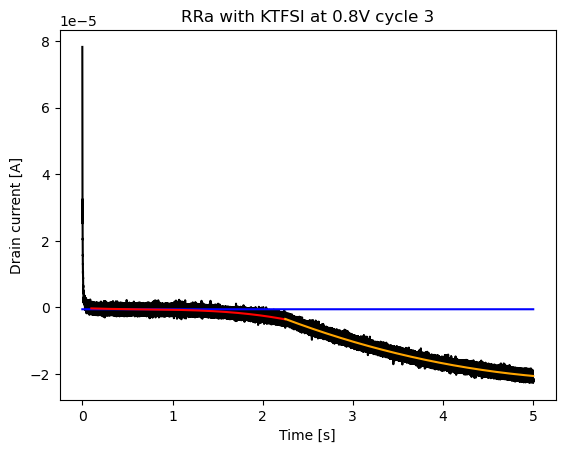

In [1300]:
figure26, axis26 = plot.subplots()

axis26.plot(xdatafunc3[index_5seconds3], ydatafunc3[index_5seconds3], linestyle = 'solid',
            marker = 'None', color = 'black')
axis26.plot(xdatafunc3[index_5seconds3], zero3[0:len3], linestyle = 'solid',
           marker = 'None', color = 'blue')
axis26.plot(xdatafunc3[start_optimize3], y_optimized3, linestyle = 'solid',
            marker = 'None', color = 'red')
axis26.plot(xdatafunc[start_optimize3b], y_optimized3b, linestyle = 'solid',
            marker = 'None', color = 'orange')

axis26.set_xlabel('Time [s]')
axis26.set_ylabel('Drain current [A]')
axis26.set_title('RRa with KTFSI at 0.8V cycle 3')

In [1257]:
df3 = ydatafunc3[start_optimize3]
df3_optimized = y_optimized3

zero3min = zero3[0] - 0.00000000005
zero3max = zero3[0] + 0.00000000005

intersect3 = np.where((df3_optimized <= zero3max) & (df3_optimized >= zero3min)) [0]
intersect3_fixed = start_optimize3[0] + intersect3[-1]
print(intersect3_fixed)
print(xdatafunc3[intersect3_fixed])

22460
0.6734632683658172


In [1322]:
def cubic4(x4, a4, b4, c4, d4):
    return a4*x4**3 + b4*x4**2 + c4*x4 + d4

a4_guess = -1
b4_guess = 1
c4_guess = 1
d4_guess = -1

popt4, pcov4 = sp.optimize.curve_fit(cubic4, xdatafunc4[start_optimize4], ydatafunc4[start_optimize4], p0 = [a4_guess, b4_guess, c4_guess, d4_guess])

a4 = popt4[0]
b4 = popt4[1]
c4 = popt4[2]
d4 = popt4[3]

print(a4)
print(b4)
print(c4)
print(d4)

average4 = np.average(ydatafunc4[15000:20000])
print(average4)
zero4 = zero + average4

y_optimized4 = (a4*xdatafunc4[start_optimize4]**3 + b4*xdatafunc4[start_optimize4]**2 + c4*xdatafunc4[start_optimize4] + d4)

-5.602375641804088e-07
9.915731104492862e-07
-8.118868842988541e-07
-3.2814994311558335e-07
-5.800714964623536e-07


In [1324]:
def cubic4b(x4b, a4b, b4b, c4b, d4b):
    return a4b*x4b**3 + b4b*x4b**2 + c4b*x4b + d4b

a4b_guess = -1
b4b_guess = 1
c4b_guess = 1
d4b_guess = -1

popt4b, pcov4b = sp.optimize.curve_fit(cubic4b, xdatafunc4[start_optimize4b], ydatafunc4[start_optimize4b], p0 = [a4b_guess, b4b_guess, c4b_guess, d4b_guess])

a4b = popt4b[0]
b4b = popt4b[1]
c4b = popt4b[2]
d4b = popt4b[3]

print(a4b)
print(b4b)
print(c4b)
print(d4b)

#average4 = np.average(ydatafunc4[15000:20000])
#print(average4)
#zero4 = zero + average4

y_optimized4b = (a4b*xdatafunc4[start_optimize4b]**3 + b4b*xdatafunc4[start_optimize4b]**2 + c4b*xdatafunc4[start_optimize4b] + d4b)

-3.01901565413355e-07
5.041215987857769e-06
-3.0830074966669524e-05
4.4842010065499705e-05


Text(0.5, 1.0, 'RRa with KTFSI at 0.8V cycle 4')

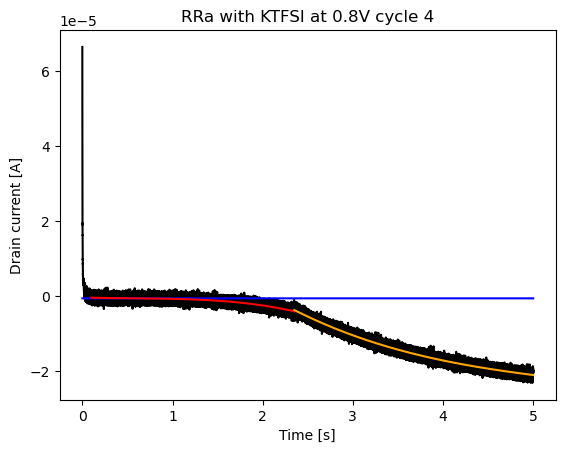

In [1326]:
figure27, axis27 = plot.subplots()

axis27.plot(xdatafunc4[index_5seconds4], ydatafunc4[index_5seconds4], linestyle = 'solid',
            marker = 'None', color = 'black')
axis27.plot(xdatafunc4[index_5seconds4], zero4[0:len4], linestyle = 'solid',
           marker = 'None', color = 'blue')
axis27.plot(xdatafunc4[start_optimize4], y_optimized4, linestyle = 'solid',
            marker = 'None', color = 'red')
axis27.plot(xdatafunc4[start_optimize4b], y_optimized4b, linestyle = 'solid',
            marker = 'None', color = 'orange')

axis27.set_xlabel('Time [s]')
axis27.set_ylabel('Drain current [A]')
axis27.set_title('RRa with KTFSI at 0.8V cycle 4')

In [1328]:
df4 = ydatafunc4[start_optimize4]
df4_optimized = y_optimized4

zero4min = zero4[0] - 0.00000000005
zero4max = zero4[0] + 0.00000000005
intersect4 = np.where((df4_optimized <= zero4max) & (df4_optimized >= zero4min)) [0]
intersect4_fixed = start_optimize4[0] + intersect4[-1]
print(intersect4_fixed)
print(xdatafunc4[intersect4_fixed])

20126
0.6034782608695652


-5.503875557916458e-07
1.038144102769074e-06
-9.017205031922169e-07
-2.8913093871480487e-07
-5.703516099739207e-07
-5.659835464516237e-07
8.328578578061489e-06
-4.462470530205075e-05
6.431976042479135e-05
19358
0.5804497751124438


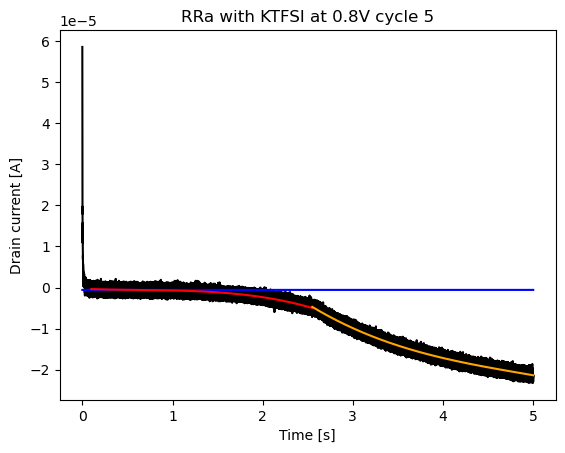

In [1330]:
def cubic5(x5, a5, b5, c5, d5):
    return a5*x5**3 + b5*x5**2 + c5*x5 + d5

a5_guess = -1
b5_guess = 1
c5_guess = 1
d5_guess = -1

popt5, pcov5 = sp.optimize.curve_fit(cubic5, xdatafunc5[start_optimize5], ydatafunc5[start_optimize5], p0 = [a5_guess, b5_guess, c5_guess, d5_guess])

a5 = popt5[0]
b5 = popt5[1]
c5 = popt5[2]
d5 = popt5[3]

print(a5)
print(b5)
print(c5)
print(d5)

average5 = np.average(ydatafunc5[15000:20000])
print(average5)
zero5 = zero + average5
y_optimized5 = (a5*xdatafunc5[start_optimize5]**3 + b5*xdatafunc5[start_optimize5]**2 + c5*xdatafunc5[start_optimize5] + d5)

#

def cubic5b(x5b, a5b, b5b, c5b, d5b):
    return a5b*x5b**3 + b5b*x5b**2 + c5b*x5b + d5b

a5b_guess = -1
b5b_guess = 1
c5b_guess = 1
d5b_guess = -1

popt5b, pcov5b = sp.optimize.curve_fit(cubic5b, xdatafunc5[start_optimize5b], ydatafunc5[start_optimize5b], p0 = [a5b_guess, b5b_guess, c5b_guess, d5b_guess])

a5b = popt5b[0]
b5b = popt5b[1]
c5b = popt5b[2]
d5b = popt5b[3]

print(a5b)
print(b5b)
print(c5b)
print(d5b)

#average5 = np.average(ydatafunc5[15000:20000])
#print(average5)
#zero5 = zero + average5
y_optimized5b = (a5b*xdatafunc5[start_optimize5b]**3 + b5b*xdatafunc5[start_optimize5b]**2 + c5b*xdatafunc5[start_optimize5b] + d5b)

#

figure28, axis28 = plot.subplots()

axis28.plot(xdatafunc5[index_5seconds5], ydatafunc5[index_5seconds5], linestyle = 'solid',
            marker = 'None', color = 'black')
axis28.plot(xdatafunc5[index_5seconds5], zero5[0:len5], linestyle = 'solid',
           marker = 'None', color = 'blue')
axis28.plot(xdatafunc5[start_optimize5], y_optimized5, linestyle = 'solid',
            marker = 'None', color = 'red')
axis28.plot(xdatafunc5[start_optimize5b], y_optimized5b, linestyle = 'solid',
            marker = 'None', color = 'orange')

axis28.set_xlabel('Time [s]')
axis28.set_ylabel('Drain current [A]')
axis28.set_title('RRa with KTFSI at 0.8V cycle 5')

df5 = ydatafunc5[start_optimize5]
df5_optimized = y_optimized5

zero5min = zero5[0] - 0.00000000005
zero5max = zero5[0] + 0.00000000005

intersect5 = np.where((df5_optimized <= zero5max) & (df5_optimized >= zero5min)) [0]
intersect5_fixed = start_optimize5[0] + intersect5[-1]
print(intersect5_fixed)
print(xdatafunc5[intersect5_fixed])

-4.781969036899627e-07
7.686405939200351e-07
-6.000641637575264e-07
-3.7908823776638297e-07
-5.739926607022179e-07
-7.445410212369623e-07
1.0791677246341975e-05
-5.59844801713053e-05
8.140361069318852e-05
21408
0.6419190404797601


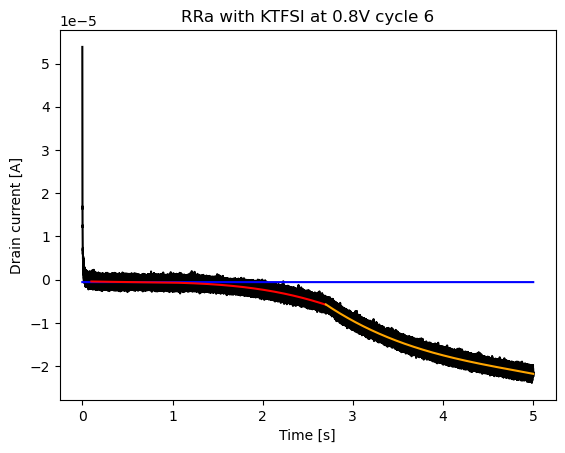

In [1332]:
def cubic6(x6, a6, b6, c6, d6):
    return a6*x6**3 + b6*x6**2 + c6*x6 + d6

a6_guess = -1
b6_guess = 1
c6_guess = 1
d6_guess = -1

popt6, pcov6 = sp.optimize.curve_fit(cubic6, xdatafunc6[start_optimize6], ydatafunc6[start_optimize6], p0 = [a6_guess, b6_guess, c6_guess, d6_guess])

a6 = popt6[0]
b6 = popt6[1]
c6 = popt6[2]
d6 = popt6[3]

print(a6)
print(b6)
print(c6)
print(d6)

average6 = np.average(ydatafunc6[15000:20000])
print(average6)
zero6 = zero + average6
y_optimized6 = (a6*xdatafunc6[start_optimize6]**3 + b6*xdatafunc6[start_optimize6]**2 + c6*xdatafunc6[start_optimize6] + d6)

#

def cubic6b(x6b, a6b, b6b, c6b, d6b):
    return a6b*x6b**3 + b6b*x6b**2 + c6b*x6b + d6b

a6b_guess = -1
b6b_guess = 1
c6b_guess = 1
d6b_guess = -1

popt6b, pcov6b = sp.optimize.curve_fit(cubic6b, xdatafunc6[start_optimize6b], ydatafunc6[start_optimize6b], p0 = [a6b_guess, b6b_guess, c6b_guess, d6b_guess])

a6b = popt6b[0]
b6b = popt6b[1]
c6b = popt6b[2]
d6b = popt6b[3]

print(a6b)
print(b6b)
print(c6b)
print(d6b)

#average6 = np.average(ydatafunc6[15000:20000])
#print(average6)
#zero6 = zero + average6
y_optimized6b = (a6b*xdatafunc6[start_optimize6b]**3 + b6b*xdatafunc6[start_optimize6b]**2 + c6b*xdatafunc6[start_optimize6b] + d6b)

#

figure29, axis29 = plot.subplots()

axis29.plot(xdatafunc6[index_5seconds6], ydatafunc6[index_5seconds6], linestyle = 'solid',
            marker = 'None', color = 'black')
axis29.plot(xdatafunc6[index_5seconds6], zero6[0:len6], linestyle = 'solid',
           marker = 'None', color = 'blue')
axis29.plot(xdatafunc6[start_optimize6], y_optimized6, linestyle = 'solid',
            marker = 'None', color = 'red')
axis29.plot(xdatafunc6[start_optimize6b], y_optimized6b, linestyle = 'solid',
            marker = 'None', color = 'orange')

axis29.set_xlabel('Time [s]')
axis29.set_ylabel('Drain current [A]')
axis29.set_title('RRa with KTFSI at 0.8V cycle 6')

df6 = ydatafunc6[start_optimize6]
df6_optimized = y_optimized6

zero6min = zero6[0] - 0.00000000005
zero6max = zero6[0] + 0.00000000005

intersect6 = np.where((df6_optimized <= zero6max) & (df6_optimized >= zero6min)) [0]
intersect6_fixed = start_optimize6[0] + intersect6[-1]
print(intersect6_fixed)
print(xdatafunc6[intersect6_fixed])

-4.681170458496401e-07
6.754896970154121e-07
-5.007359358252827e-07
-4.052836920579111e-07
-5.808059573378339e-07
-9.805085834456995e-07
1.3822743133443608e-05
-6.889978172046526e-05
9.910368721808984e-05
22710
0.68095952023988


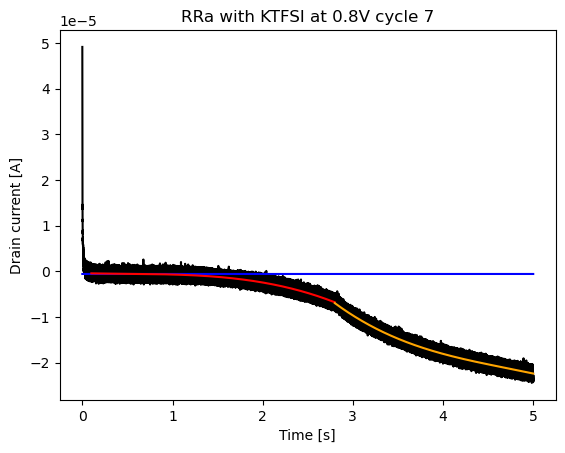

In [1333]:
def cubic7(x7, a7, b7, c7, d7):
    return a7*x7**3 + b7*x7**2 + c7*x7 + d7

a7_guess = -1
b7_guess = 1
c7_guess = 1
d7_guess = -1

popt7, pcov7 = sp.optimize.curve_fit(cubic7, xdatafunc7[start_optimize7], ydatafunc7[start_optimize7], p0 = [a7_guess, b7_guess, c7_guess, d7_guess])

a7 = popt7[0]
b7 = popt7[1]
c7 = popt7[2]
d7 = popt7[3]

print(a7)
print(b7)
print(c7)
print(d7)

average7 = np.average(ydatafunc7[15000:20000])
print(average7)
y_optimized7 = (a7*xdatafunc7[start_optimize7]**3 + b7*xdatafunc7[start_optimize7]**2 + c7*xdatafunc7[start_optimize7] + d7)
zero7 = zero + average7

#

def cubic7b(x7b, a7b, b7b, c7b, d7b):
    return a7b*x7b**3 + b7b*x7b**2 + c7b*x7b + d7b

a7b_guess = -1
b7b_guess = 1
c7b_guess = 1
d7b_guess = -1

popt7b, pcov7b = sp.optimize.curve_fit(cubic7b, xdatafunc7[start_optimize7b], ydatafunc7[start_optimize7b], p0 = [a7b_guess, b7b_guess, c7b_guess, d7b_guess])

a7b = popt7b[0]
b7b = popt7b[1]
c7b = popt7b[2]
d7b = popt7b[3]

print(a7b)
print(b7b)
print(c7b)
print(d7b)

#average7 = np.average(ydatafunc7[15000:20000])
#print(average7)
y_optimized7b = (a7b*xdatafunc7[start_optimize7b]**3 + b7b*xdatafunc7[start_optimize7b]**2 + c7b*xdatafunc7[start_optimize7b] + d7b)
#zero7 = zero + average7

#

figure30, axis30 = plot.subplots()

axis30.plot(xdatafunc7[index_5seconds7], ydatafunc7[index_5seconds7], linestyle = 'solid',
            marker = 'None', color = 'black')
axis30.plot(xdatafunc7[index_5seconds7], zero7[0:len7], linestyle = 'solid',
           marker = 'None', color = 'blue')
axis30.plot(xdatafunc7[start_optimize7], y_optimized7, linestyle = 'solid',
            marker = 'None', color = 'red')
axis30.plot(xdatafunc7[start_optimize7b], y_optimized7b, linestyle = 'solid',
            marker = 'None', color = 'orange')

axis30.set_xlabel('Time [s]')
axis30.set_ylabel('Drain current [A]')
axis30.set_title('RRa with KTFSI at 0.8V cycle 7')

df7 = ydatafunc7[start_optimize7]
df7_optimized = y_optimized7

zero7min = zero7[0] - 0.00000000005
zero7max = zero7[0] + 0.00000000005

intersect7 = np.where((df7_optimized <= zero7max) & (df7_optimized >= zero7min)) [0]
intersect7_fixed = start_optimize7[0] + intersect7[-1]
print(intersect7_fixed)
print(xdatafunc7[intersect7_fixed])

-4.5725733356620846e-07
5.784282659783879e-07
-3.991577809407318e-07
-4.1432752509851247e-07
-5.802590183824891e-07
-1.2567087258934334e-06
1.7334018332396697e-05
-8.366992648395247e-05
0.00011934917215211102
24905
0.746776611694153


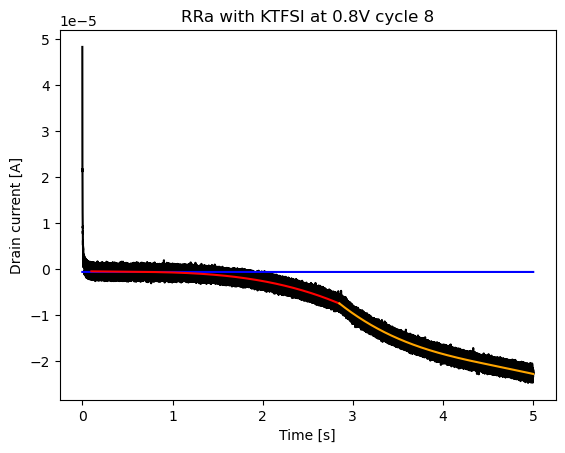

In [1335]:
def cubic8(x8, a8, b8, c8, d8):
    return a8*x8**3 + b8*x8**2 + c8*x8 + d8

a8_guess = -1
b8_guess = 1
c8_guess = 1
d8_guess = -1

popt8, pcov8 = sp.optimize.curve_fit(cubic8, xdatafunc8[start_optimize8], ydatafunc8[start_optimize8], p0 = [a8_guess, b8_guess, c8_guess, d8_guess])

a8 = popt8[0]
b8 = popt8[1]
c8 = popt8[2]
d8 = popt8[3]

print(a8)
print(b8)
print(c8)
print(d8)

average8 = np.average(ydatafunc8[15000:20000])
print(average8)
y_optimized8 = (a8*xdatafunc8[start_optimize8]**3 + b8*xdatafunc8[start_optimize8]**2 + c8*xdatafunc8[start_optimize8] + d8)
zero8 = zero + average8

#

def cubic8b(x8b, a8b, b8b, c8b, d8b):
    return a8b*x8b**3 + b8b*x8b**2 + c8b*x8b + d8b

a8b_guess = -1
b8b_guess = 1
c8b_guess = 1
d8b_guess = -1

popt8b, pcov8b = sp.optimize.curve_fit(cubic8b, xdatafunc8[start_optimize8b], ydatafunc8[start_optimize8b], p0 = [a8b_guess, b8b_guess, c8b_guess, d8b_guess])

a8b = popt8b[0]
b8b = popt8b[1]
c8b = popt8b[2]
d8b = popt8b[3]

print(a8b)
print(b8b)
print(c8b)
print(d8b)

#average8 = np.average(ydatafunc8[15000:20000])
#print(average8)
y_optimized8b = (a8b*xdatafunc8[start_optimize8b]**3 + b8b*xdatafunc8[start_optimize8b]**2 + c8b*xdatafunc8[start_optimize8b] + d8b)
#zero8 = zero + average8

#

figure31, axis31 = plot.subplots()

axis31.plot(xdatafunc8[index_5seconds8], ydatafunc8[index_5seconds8], linestyle = 'solid',
            marker = 'None', color = 'black')
axis31.plot(xdatafunc8[index_5seconds8], zero8[0:len8], linestyle = 'solid',
           marker = 'None', color = 'blue')
axis31.plot(xdatafunc8[start_optimize8], y_optimized8, linestyle = 'solid',
            marker = 'None', color = 'red')
axis31.plot(xdatafunc8[start_optimize8b], y_optimized8b, linestyle = 'solid',
             marker = 'None', color = 'orange')

axis31.set_xlabel('Time [s]')
axis31.set_ylabel('Drain current [A]')
axis31.set_title('RRa with KTFSI at 0.8V cycle 8')

df8 = ydatafunc8[start_optimize8]
df8_optimized = y_optimized8

zero8min = zero8[0] - 0.000000000005
zero8max = zero8[0] + 0.000000000005

intersect8 = np.where((df8_optimized <= zero8max) & (df8_optimized >= zero8min)) [0]
intersect8_fixed = start_optimize8[0] + intersect8[-1]
print(intersect8_fixed)
print(xdatafunc8[intersect8_fixed])

-3.9548041118481285e-07
2.987653330942887e-07
-7.750872125378689e-08
-5.113807174330182e-07
-5.818060742835566e-07
-1.3939277017376009e-06
1.9210217650133577e-05
-9.21192230356206e-05
0.0001317898368826595
26415
0.7920539730134932


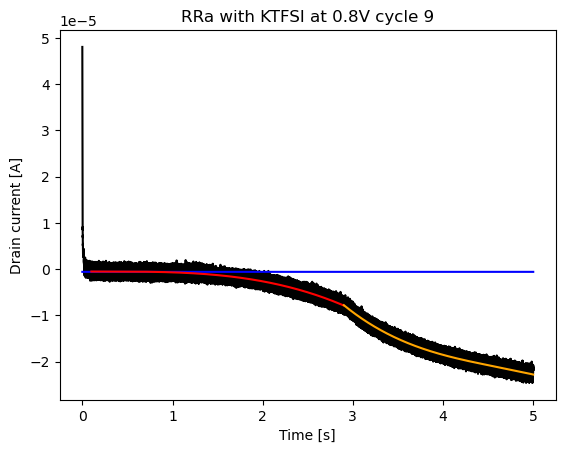

In [1336]:
def cubic9(x9, a9, b9, c9, d9):
    return a9*x9**3 + b9*x9**2 + c9*x9 + d9

a9_guess = -1
b9_guess = 1
c9_guess = 1
d9_guess = -1

popt9, pcov9 = sp.optimize.curve_fit(cubic9, xdatafunc9[start_optimize9], ydatafunc9[start_optimize9], p0 = [a9_guess, b9_guess, c9_guess, d9_guess])

a9 = popt9[0]
b9 = popt9[1]
c9 = popt9[2]
d9 = popt9[3]

print(a9)
print(b9)
print(c9)
print(d9)

average9 = np.average(ydatafunc9[15000:20000])
print(average9)
y_optimized9 = (a9*xdatafunc9[start_optimize9]**3 + b9*xdatafunc9[start_optimize9]**2 + c9*xdatafunc9[start_optimize9] + d9)
zero9 = zero + average9

#

def cubic9b(x9b, a9b, b9b, c9b, d9b):
    return a9b*x9b**3 + b9b*x9b**2 + c9b*x9b + d9b

a9b_guess = -1
b9b_guess = 1
c9b_guess = 1
d9b_guess = -1

popt9b, pcov9b = sp.optimize.curve_fit(cubic9b, xdatafunc9[start_optimize9b], ydatafunc9[start_optimize9b], p0 = [a9b_guess, b9b_guess, c9b_guess, d9b_guess])

a9b = popt9b[0]
b9b = popt9b[1]
c9b = popt9b[2]
d9b = popt9b[3]

print(a9b)
print(b9b)
print(c9b)
print(d9b)

#average9 = np.average(ydatafunc9[15000:20000])
#print(average9)
y_optimized9b = (a9b*xdatafunc9[start_optimize9b]**3 + b9b*xdatafunc9[start_optimize9b]**2 + c9b*xdatafunc9[start_optimize9b] + d9b)
#zero9 = zero + average9

#

figure32, axis32 = plot.subplots()

axis32.plot(xdatafunc9[index_5seconds9], ydatafunc9[index_5seconds9], linestyle = 'solid',
            marker = 'None', color = 'black')
axis32.plot(xdatafunc9[index_5seconds9], zero9[0:len9], linestyle = 'solid',
           marker = 'None', color = 'blue')
axis32.plot(xdatafunc9[start_optimize9], y_optimized9, linestyle = 'solid',
            marker = 'None', color = 'red')
axis32.plot(xdatafunc9[start_optimize9b], y_optimized9b, linestyle = 'solid',
            marker = 'None', color = 'orange')

axis32.set_xlabel('Time [s]')
axis32.set_ylabel('Drain current [A]')
axis32.set_title('RRa with KTFSI at 0.8V cycle 9')

df9 = ydatafunc9[start_optimize9]
df9_optimized = y_optimized9

zero9min = zero9[0] - 0.00000000005
zero9max = zero9[0] + 0.00000000005

intersect9 = np.where((df9_optimized <= zero9max) & (df9_optimized >= zero9min)) [0]
intersect9_fixed = start_optimize9[0] + intersect9[-1]
print(intersect9_fixed)
print(xdatafunc9[intersect9_fixed])

-3.435243803233812e-07
7.208635858283566e-08
1.589067655156113e-07
-5.721027922646885e-07
-5.818060742835566e-07
-1.524170274852388e-06
2.0953617636908835e-05
-9.987553922252679e-05
0.0001432583700263125
27276
0.8178710644677661


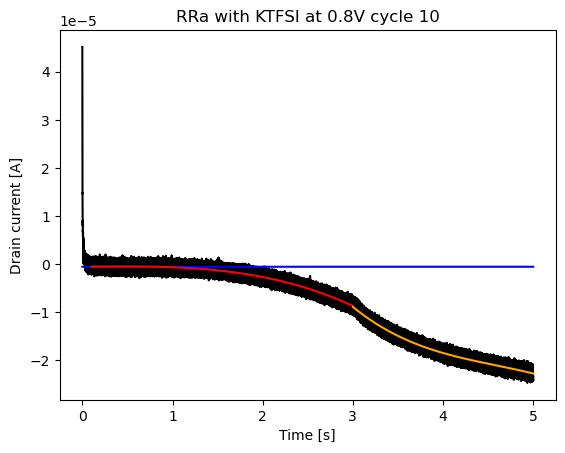

In [1338]:
def cubic10(x10, a10, b10, c10, d10):
    return a10*x10**3 + b10*x10**2 + c10*x10 + d10

a10_guess = -1
b10_guess = 1
c10_guess = 1
d10_guess = -1

popt10, pcov10 = sp.optimize.curve_fit(cubic10, xdatafunc10[start_optimize10], ydatafunc10[start_optimize10], p0 = [a10_guess, b10_guess, c10_guess, d10_guess])

a10 = popt10[0]
b10 = popt10[1]
c10 = popt10[2]
d10 = popt10[3]

print(a10)
print(b10)
print(c10)
print(d10)

average10 = np.average(ydatafunc9[15000:20000])
print(average10)
y_optimized10 = (a10*xdatafunc10[start_optimize10]**3 + b10*xdatafunc10[start_optimize10]**2 + c10*xdatafunc10[start_optimize10] + d10)
zero10 = zero + average10

#

def cubic10b(x10b, a10b, b10b, c10b, d10b):
    return a10b*x10b**3 + b10b*x10b**2 + c10b*x10b + d10b

a10b_guess = -1
b10b_guess = 1
c10b_guess = 1
d10b_guess = -1

popt10b, pcov10b = sp.optimize.curve_fit(cubic10b, xdatafunc10[start_optimize10b], ydatafunc10[start_optimize10b], p0 = [a10b_guess, b10b_guess, c10b_guess, d10b_guess])

a10b = popt10b[0]
b10b = popt10b[1]
c10b = popt10b[2]
d10b = popt10b[3]

print(a10b)
print(b10b)
print(c10b)
print(d10b)

#average10 = np.average(ydatafunc9[15000:20000])
#print(average10)
y_optimized10b = (a10b*xdatafunc10[start_optimize10b]**3 + b10b*xdatafunc10[start_optimize10b]**2 + c10b*xdatafunc10[start_optimize10b] + d10b)
#zero10 = zero + average10

#

figure33, axis33 = plot.subplots()

axis33.plot(xdatafunc10[index_5seconds10], ydatafunc10[index_5seconds10], linestyle = 'solid',
            marker = 'None', color = 'black')
axis33.plot(xdatafunc10[index_5seconds10], zero10[0:len10], linestyle = 'solid',
           marker = 'None', color = 'blue')
axis33.plot(xdatafunc10[start_optimize10], y_optimized10, linestyle = 'solid',
            marker = 'None', color = 'red')
axis33.plot(xdatafunc10[start_optimize10b], y_optimized10b, linestyle = 'solid',
            marker = 'None', color = 'orange')

axis33.set_xlabel('Time [s]')
axis33.set_ylabel('Drain current [A]')
axis33.set_title('RRa with KTFSI at 0.8V cycle 10')

df10 = ydatafunc10[start_optimize10]
df10_optimized = y_optimized10

zero10min = zero10[0] - 0.00000000005
zero10max = zero10[0] + 0.00000000005

intersect10 = np.where((df10_optimized <= zero10max) & (df10_optimized >= zero10min)) [0]
intersect10_fixed = start_optimize10[0] + intersect10[-1]
print(intersect10_fixed)
print(xdatafunc10[intersect10_fixed])

ValueError: x and y must have same first dimension, but have shapes (70036,) and (166751,)

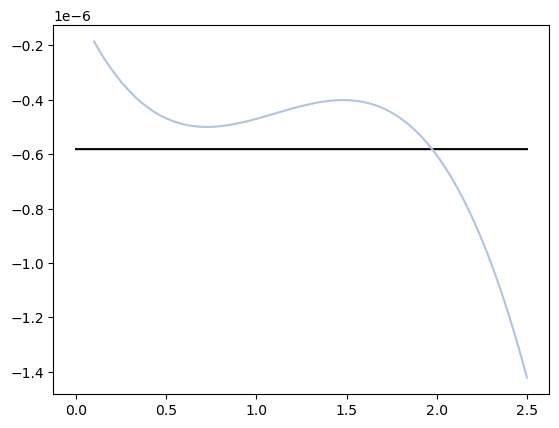

In [1339]:
figure36, axis36 = plot.subplots()

axis36.plot(xdatafunc[0:start_optimize1[-1]], zero10[0:start_optimize1[-1]], linestyle = 'solid',
           marker = 'None', color = 'black')
axis36.plot(xdatafunc[start_optimize1], y_optimized1, linestyle = 'solid',
            marker = 'None', color = 'lightsteelblue')
axis36.plot(xdatafunc2[start_optimize2], y_optimized2, linestyle = 'solid',
            marker = 'None', color = 'cornflowerblue')
axis36.plot(xdatafunc3[start_optimize3], y_optimized3, linestyle = 'solid',
            marker = 'None', color = 'royalblue')
axis36.plot(xdatafunc4[start_optimize4], y_optimized4, linestyle = 'solid',
            marker = 'None', color = 'blue')
axis36.plot(xdatafunc5[start_optimize5], y_optimized5, linestyle = 'solid',
            marker = 'None', color = 'mediumblue')
axis36.plot(xdatafunc6[start_optimize6], y_optimized6, linestyle = 'solid',
            marker = 'None', color = 'darkblue')
axis36.plot(xdatafunc7[start_optimize7], y_optimized7, linestyle = 'solid',
            marker = 'None', color = 'navy')
axis36.plot(xdatafunc8[start_optimize8], y_optimized8, linestyle = 'solid',
            marker = 'None', color = 'midnightblue')
axis36.plot(xdatafunc9[start_optimize9], y_optimized9, linestyle = 'solid',
            marker = 'None', color = 'indigo')
axis36.plot(xdatafunc10[start_optimize10], y_optimized10, linestyle = 'solid',
            marker = 'None', color = 'darkorchid')
axis36.set_xlabel('Time [s]', fontsize = 12)
axis36.set_ylabel('Drain Current [A]', fontsize = 12)
axis36.set_title('Cycle number RRe P3HT at 0.5V', fontsize = 12)

ValueError: x and y must have same first dimension, but have shapes (70036,) and (166751,)

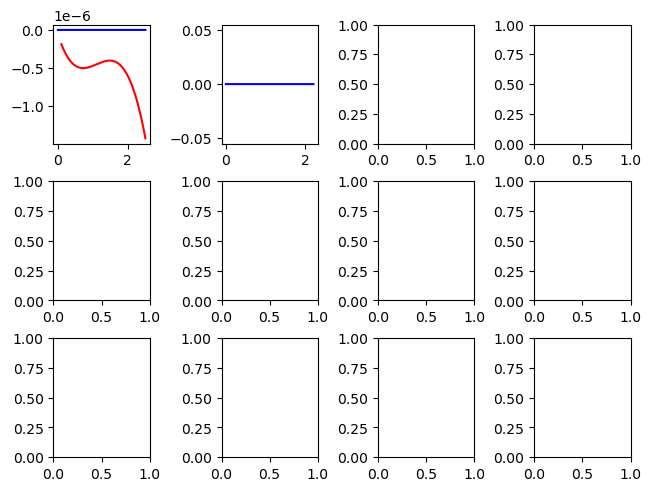

In [1342]:
fig, ax = plot.subplots(3, 4, layout = 'constrained')

ax[0,0].plot(xdatafunc[0:start_optimize1[-1]], zero[0:start_optimize1[-1]], linestyle = 'solid',
           marker = 'None', color = 'blue')
ax[0,0].plot(xdatafunc[start_optimize1], y_optimized1, linestyle = 'solid',
            marker = 'None', color = 'red')

ax[0,1].plot(xdatafunc2[0:start_optimize2[-1]], zero[0:start_optimize2[-1]], linestyle = 'solid',
           marker = 'None', color = 'blue')
ax[0,1].plot(xdatafunc2[start_optimize2], y_optimized2, linestyle = 'solid',
            marker = 'None', color = 'red')

ax[0,2].plot(xdatafunc3[0:start_optimize3[-1]], zero[0:start_optimize3[-1]], linestyle = 'solid',
           marker = 'None', color = 'blue')
ax[0,2].plot(xdatafunc3[start_optimize3], y_optimized3, linestyle = 'solid',
            marker = 'None', color = 'red')

ax[0,3].plot(xdatafunc4[0:start_optimize4[-1]], zero[0:start_optimize4[-1]], linestyle = 'solid',
             marker = 'None', color = 'blue')
ax[0,3].plot(xdatafunc4[start_optimize4], y_optimized4, linestyle = 'solid',
            marker = 'None', color = 'red')

ax[1,0].plot(xdatafunc5[0:start_optimize5[-1]], zero[0:start_optimize5[-1]], linestyle = 'solid',
             marker = 'None', color = 'blue')
ax[1,0].plot(xdatafunc5[start_optimize5], y_optimized5, linestyle = 'solid',
            marker = 'None', color = 'red')

ax[1,1].plot(xdatafunc6[0:start_optimize6[-1]], zero[0:start_optimize6[-1]], linestyle = 'solid',
           marker = 'None', color = 'blue')
ax[1,1].plot(xdatafunc6[start_optimize6], y_optimized6, linestyle = 'solid',
            marker = 'None', color = 'red')

In [1344]:
propagation_time = [xdatafunc[intersect1_fixed], xdatafunc2[intersect2_fixed], xdatafunc3[intersect3_fixed], 
                     xdatafunc4[intersect4_fixed], xdatafunc5[intersect5_fixed], xdatafunc6[intersect6_fixed], 
                     xdatafunc7[intersect7_fixed], xdatafunc8[intersect8_fixed], xdatafunc9[intersect9_fixed], xdatafunc[intersect10_fixed]]
df_time = pd.DataFrame(propagation_time)
print(df_time)
cycle_number = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

          0
0  1.727166
1  0.618531
2  0.673463
3  0.603478
4  0.580450
5  0.641919
6  0.680960
7  0.746777
8  0.792054
9  0.817871


Text(0.5, 1.0, 'RRe P3HT with KCl at 0.7V')

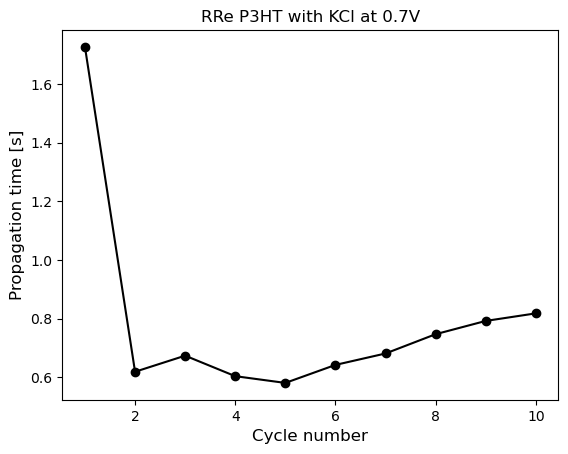

In [1346]:
figure34, axis34 = plot.subplots()

axis34.plot(cycle_number, propagation_time, linestyle = 'solid',
            marker = 'o', color = 'black')

axis34.set_xlabel('Cycle number', fontsize = 12)
axis34.set_ylabel('Propagation time [s]', fontsize = 12)
axis34.set_title('RRe P3HT with KCl at 0.7V', fontsize = 12)

Text(0.5, 1.0, 'RRa with KTFSI P3HT at 0.8V')

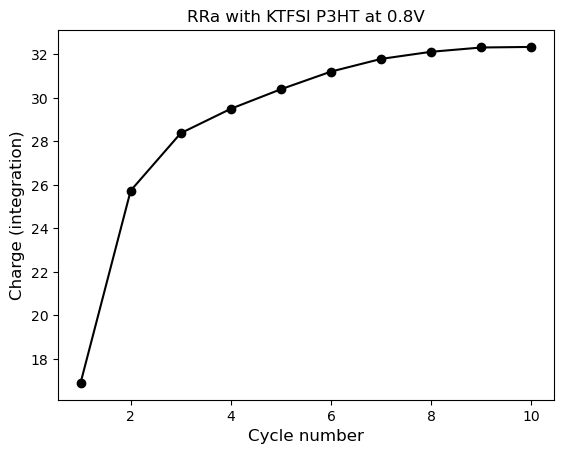

In [1448]:
figure35, axis35 = plot.subplots()

axis35.plot(cycle_number, integration, linestyle = 'solid',
            marker = 'o', color = 'black')
axis35.set_xlabel('Cycle number', fontsize = 12)
axis35.set_ylabel('Charge (integration)', fontsize = 12)
axis35.set_title('RRa with KTFSI P3HT at 0.8V', fontsize = 12)

In [1450]:
print(integration)

[16.899131845234958, 25.73472325641424, 28.37639706014751, 29.497221664974752, 30.395096115537317, 31.20585054701581, 31.788602753205055, 32.11632291569157, 32.31238986219922, 32.33865055949248]


In [1452]:
slope_change = [xdatafunc2[start_optimize2[-1]], xdatafunc3[start_optimize3[-1]], xdatafunc4[start_optimize4[-1]], xdatafunc5[start_optimize5[-1]], xdatafunc6[start_optimize6[-1]], xdatafunc7[start_optimize7[-1]], xdatafunc8[start_optimize8[-1]], xdatafunc9[start_optimize9[-1]], xdatafunc10[start_optimize10[-1]]]

Text(0.5, 1.0, 'RRa with KTFSI P3HT at 0.8V, change in slope')

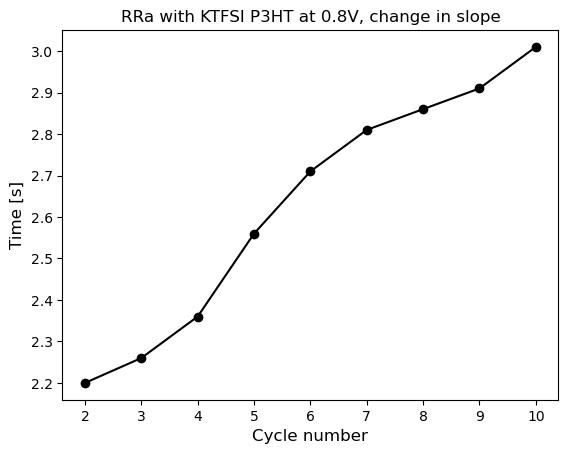

In [1454]:
figure36, axis36 = plot.subplots()

axis36.plot(cycle_number[1:], slope_change, linestyle = 'solid',
            marker = 'o', color = 'black')
axis36.set_xlabel('Cycle number', fontsize = 12)
axis36.set_ylabel('Time [s]', fontsize = 12)
axis36.set_title('RRa with KTFSI P3HT at 0.8V, change in slope', fontsize = 12)

In [1456]:
print(slope_change)

[2.2, 2.2599700149925037, 2.36, 2.56, 2.709985007496252, 2.809985007496252, 2.86, 2.909985007496252, 3.009985007496252]
